<a href="https://colab.research.google.com/github/Bhushan0097/04.CAPSTONE.UnsupervisedML-Netflix-Movies-and-TV-Shows-Clustering/blob/main/Notebook/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Buddhabhushan Nagrale
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

### **Netflix Movies and TV Shows: Clustering**
<hr>


The  objective of this project is to group similar movies and TV shows based on their attributes, leading to the identification of distinct content clusters. Clustering analysis will enable us to understand the underlying structures within the Netflix dataset, potentially revealing hidden trends, preferences, and relationships among different variables.


**Methodology:**

To achieve our objective, we will employ clustering algorithms, a subset of unsupervised machine learning techniques. Unsupervised learning is particularly suitable for this project as it allows us to discover patterns without predefined labels. The clustering process involves grouping similar items together based on certain features.



**Significance of the Project:**

Understanding the clustering patterns within the Netflix dataset has practical implications for content curation, user engagement, and strategic decision-making. It can assist Netflix in tailoring recommendations, improving content discovery, and optimizing their content library to align with viewer preferences.

**Conclusion:**

This capstone project aims to provide valuable insights into the organization and patterns inherent in the vast collection of Netflix movies and TV shows. By leveraging clustering analysis, we hope to contribute to a deeper understanding of viewer preferences, content diversity, and temporal trends, ultimately benefiting both the streaming platform and its users. As the digital entertainment landscape continues to evolve, this project serves as a testament to the relevance of data-driven approaches in extracting meaningful insights from vast and dynamic content repositories.








# **GitHub Link -**

https://github.com/Bhushan0097/04.CAPSTONE.UnsupervisedML-Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


 Explore and uncover patterns within the vast Netflix library through clustering analysis. By utilizing a dataset comprising various attributes such as type, title, director, cast, country, release year, rating, duration, listed in, and description, our goal is to gain insights into the diverse content offered by Netflix in order to enhance viewer Experience

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load Dataset

path = '/content/gdrive/MyDrive/AlmaBetter/Module 6 Machine Learning/Capstone Project - UnSupervised'

Netflix_df = pd.read_csv(path + '/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' , encoding='utf-8')

### Dataset First View

In [ ]:
# Dataset First Look
Netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print('No of Rows    : ',Netflix_df.shape[0])
print('No of Columns : ',Netflix_df.shape[1])

No of Rows    :  7787
No of Columns :  12


### Dataset Information

In [ ]:
# Dataset Info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f'Total Number of Duplicate Records found : {Netflix_df.duplicated(keep=False).sum()}')

Total Number of Duplicate Records found : 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(" Count total NaN at each column in a DataFrame : \n")
null_count = Netflix_df.isnull().sum()
print(null_count)

 Count total NaN at each column in a DataFrame : 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


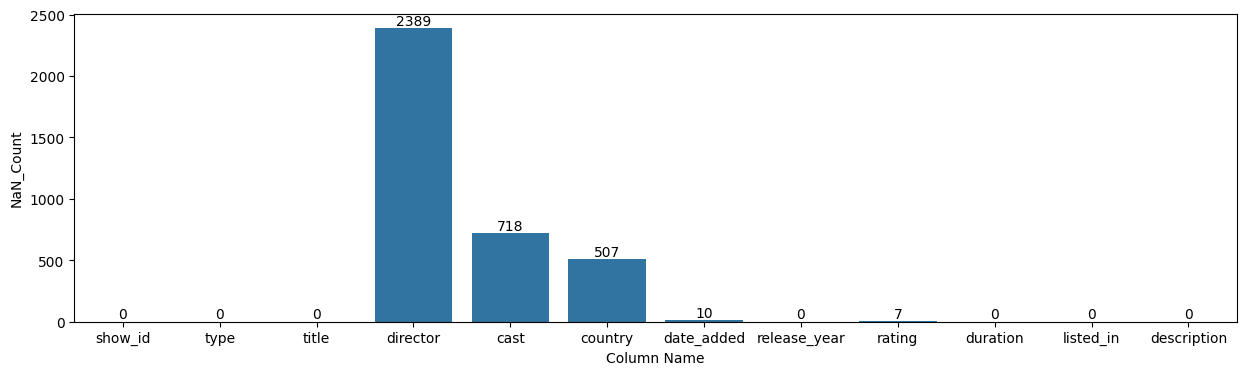

In [ ]:
# Visualizing the missing values

missing_nan = Netflix_df.isnull().sum().reset_index()  #storing the data as a dataframe
missing_nan.rename(columns = {'index':'Column Name',0:'NaN_Count'}, inplace = True)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

vis = sns.barplot(data=missing_nan, x="Column Name", y="NaN_Count")

vis.set_xticklabels(labels=missing_nan['Column Name'])  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)


# Show the plot
plt.show()

### What did you know about your dataset?

The dataset encompasses a range of information, including the type of content (movie or TV show), title, director, cast, country of production, release year, rating, duration, genre, and a brief description. Each attribute carries significance, providing a comprehensive view of the characteristics that define the Netflix content library.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The description of the variables in the 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' dataset :

<table>
    <thead>
      <tr>
        <th> <h4> <b> Sr. No </b> </h4> </th>
        <th> <h4> <b> Column Name </b> </h4> </th>
        <th> <h4> <b> Description </b> </h4> </th>
      </tr>
    </thead>
    <tbody>
      <tr>
<td> <h6> 1 </h6></td>
<td> <h6> type </h6></td>
<td> <h6>   Indicates whether the entry is a movie or a TV show </h5></td>
</tr>

<tr>
<td> <h6> 2 </h6></td>
<td> <h6> title </h6></td>
<td> <h6>  The title of the movie or TV show </h6></td>
</tr>

<tr>
<td> <h6> 3 </h6></td>
<td> <h6> director </h6></td>
<td> <h6>  The director(s) of the movie or TV show.</h5></td>
</tr>

<tr>
<td> <h6> 4 </h6></td>
<td> <h6> cast </h6></td>
<td> <h6>  The main cast or actors involved in the movie or TV show. </h6></td>
</tr>

<tr>
<td> <h6> 5 </h6></td>
<td> <h6> country </h6></td>
<td> <h6>  The country or countries where the movie or TV show was produced. </h6></td>
</tr>

<tr>
<td> <h6> 6 </h6></td>
<td> <h6> release_year </h6></td>
<td> <h6> The year when the movie or TV show was released.</h6></td>
</tr>

<tr>
<td> <h6> 7 </h6></td>
<td> <h6> rating </h6></td>
<td> <h6>  This columns contains the total previous mails from the same source </h6></td>
</tr>

<tr>
<td> <h6> 8 </h6></td>
<td> <h6> duration </h6></td>
<td> <h6>   The rating assigned to the movie or TV show.</h6></td>
</tr>

<tr>
<td> <h6> 9 </h6></td>
<td> <h6> listed_in </h6></td>
<td> <h6>  The category or genre under which the movie or TV show is listed </h6></td>
</tr>

<tr>
<td> <h6> 10 </h5></h6>
<td> <h6> description </h6></td>
<td> <h6> A brief summary or description of the movie or TV show.</h6></td>
</tr>

</tbody>
  </table>


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
from prettytable import PrettyTable #importing PrettyTable for tabular visualatization of data
tab = PrettyTable()

tab.field_names = ["Variable", "No. of Unique Values","Unique Values"]

# checking uniquw values for only categorical variable
cat= ['rating','type']

for x in Netflix_df[cat]:
  tab.add_row([x, Netflix_df[x].nunique(),Netflix_df[x].unique()])

tab.align["Variable"] = "l" #setting alingment of Column to left


print(tab)

+----------+----------------------+--------------------------------------------------------------------------+
| Variable | No. of Unique Values |                              Unique Values                               |
+----------+----------------------+--------------------------------------------------------------------------+
| rating   |          14          | ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG' |
|          |                      |                       'G' 'NC-17' 'TV-Y7-FV' 'UR']                       |
| type     |          2           |                           ['TV Show' 'Movie']                            |
+----------+----------------------+--------------------------------------------------------------------------+


## 3. ***Data Wrangling***

### Data Wrangling Code

>  <h4> <b> 1. Dropping Columns </b> </h4>


<h5> <i> <b>show_id </b>:   each cell represents an ID associated with a show and title. For Data Analysis and Preprocessing the column isn't important.



In [ ]:
Netflix_df = Netflix_df.drop(['show_id'], axis=1)
Netflix_df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


>  <h4> <b> 2. Handling Missing/ Null Values

In [ ]:
def missing_values(df) :

  headers = ["Column", "Count" , "Ratio"]

  na_columns_ =[col for col in df.columns if df[col].isnull().sum() > 0]

  if len(na_columns_) != 0 :
    print("Columns with Null value , their count and Ratio\n")
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending = True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending = True)
    table = [[m,n,o]for m,n,o  in zip(n_miss.index,n_miss,ratio_) if n != 0]
    print(tabulate(table, headers, tablefmt="github"))

  else :
    print("Columns with Null value and their count\n")
    return df.isnull().sum()

missing_values(Netflix_df)

Columns with Null value , their count and Ratio

| Column     |   Count |      Ratio |
|------------|---------|------------|
| rating     |       7 |  0.0898934 |
| date_added |      10 |  0.128419  |
| country    |     507 |  6.51085   |
| cast       |     718 |  9.2205    |
| director   |    2389 | 30.6793    |


##### **• rating** - replacing the null values with mode value of rating since  rating is a categorical column

In [ ]:
#Replacing the null values with mode value of rating since  rating is a categorical column
Mode_Value = Netflix_df['rating'].mode()[0]
Netflix_df['rating'] = Netflix_df['rating'].fillna(Mode_Value)

In [ ]:
Netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# storing the original data into another dataframe before handling remaining missing values
original_df = Netflix_df.copy()

#### **• Replacing missing values of country , cast and directory with Not Available**

In [ ]:
Netflix_df[['director','cast','country']] = Netflix_df[['director','cast','country']].fillna('Not Available')
missing_values(Netflix_df)

Columns with Null value , their count and Ratio

| Column     |   Count |    Ratio |
|------------|---------|----------|
| date_added |      10 | 0.128419 |


##### **• date_added** - date_added has only 10 records that contain null value and hence can be dropped

In [ ]:
Netflix_df = Netflix_df.dropna()
missing_values(Netflix_df)

Columns with Null value and their count



type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

>  <h4> <b> 3. Studying the Variables

#### **i. title** - represents the name of the movie/show

In [ ]:
Netflix_df['title'].head(50)

0                                      3%
1                                    7:19
2                                   23:59
3                                       9
4                                      21
5                                      46
6                                     122
7                                     187
8                                     706
9                                    1920
10                                   1922
11                                   1983
12                                   1994
13                                  2,215
14                                   3022
15                                 Oct-01
16                                 Feb-09
17                                 22-Jul
18                                 15-Aug
19                                    '89
20                   ​​Kuch Bheege Alfaaz
21                           ​Goli Soda 2
22                     ​Maj Rati ​​Keteki
23                            ​May

><h5> <i> title columns contain movie name in english as well as in non-english characters.

##### **ii. Country** - represents the name of the country where the movie/show is produced.

In [ ]:
Netflix_df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        Not Available
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7777, dtype: object

><h5> <i> there are rows which shows that a show or movie was produced in multiple countries

In [ ]:

#Function to get the type  of element presnet in a text column
def str_to_list_set(col):
  list1 = [x for x in col]
  list2 = ','.join(list1).split(',')
  list3 = [ x.strip() for x in list2 ]

  return set(list3)

In [ ]:
Countries =  str_to_list_set(Netflix_df['country'])

print("Number of Countries where a show/movie is produced : " ,len(Countries) )

Number of Countries where a show/movie is produced :  119


##### **ii. listed_in** - Genre of the show/movie

><h5> <i> A movie produced can be based on single or multiple type of Genre.

In [ ]:
genre_type =  str_to_list_set(Netflix_df['listed_in'])

print("Total Types of Genre present : " ,len(genre_type) )

Total Types of Genre present :  42


##### **ii. rating** - TV rating of the show

In [ ]:
Netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

><h5>  Netflix uses a maturity rating system based on content such as violence, language, and substance use.</h5>
<b> TV Ratings (Television Parental Guidelines): </b><ul><li>TV-Y: Suitable for all ages. </li><li>TV-Y7: Suitable for ages 7 and above.</li><li>TV-G: Suitable for general audiences.</li><li>TV-PG: Parental guidance suggested.</li><li>TV-14: Parents strongly cautioned</li><li>TV-MA: Mature audience only.</li> </ul><b> Movie Ratings (Motion Picture Association of America): </b><ul><li>G: General audiences.</li><li>PG: Parental guidance suggested.</li><li>PG-13: Parents strongly cautioned.</li><li>R: Restricted. Under 17 requires accompanying parent or adult guardian.</li><li>NC-17: No children under 17. Adult content.</li></ul><b><h5> Other Ratings:  </b></h5><ul><li>NR: Not rated. </li><li>UR: Unrated.</li><li>TV-Y7-FV: Fantasy or violence suitable for ages 7 and above.

In [ ]:
# Create a mapping for the ratings
rating_mapping = {'TV-MA': 18, 'R': 17, 'PG-13': 13, 'TV-14': 14, 'TV-PG': 12, 'NR': 0, 'TV-G': 0, 'TV-Y': 0, 'TV-Y7': 7, 'PG': 12, 'G': 0, 'NC-17': 17, 'TV-Y7-FV': 7, 'UR': 0}

Netflix_df['rating'] = Netflix_df['rating'].map(rating_mapping)
Netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,18,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,18,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,17,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,13,123 min,Dramas,A brilliant group of students become card-coun...


##### **iii. duration** - Total Duration in minutes or number of seasons

In [ ]:
duration_data = Netflix_df[['type','duration']]
duration_data

,type,duration
0,TV Show,4 Seasons
1,Movie,93 min
2,Movie,78 min
3,Movie,80 min
4,Movie,123 min
...,...,...
7782,Movie,99 min
7783,Movie,111 min
7784,Movie,44 min
7785,TV Show,1 Season


> <h5> <i> Converting the duration column into bins of interval 10 for Movie

In [ ]:
import re

# Function to convert durations to bins of 10 minutes
def convert_to_bins(duration):
    if 'min' in duration:
        # Extract the numeric value from the duration
        minutes = int(re.search(r'\d+', duration).group())
        # Convert to bins of 10 minutes
        bins = (minutes // 10) * 10
        return f'{bins}-{bins+9} min'
    else:
        return duration

# Apply the function to the 'duration' column
Netflix_df['duration2'] = Netflix_df['duration'].apply(convert_to_bins)

In [ ]:
Netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration2
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,18,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4 Seasons
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,18,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,90-99 min
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,17,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",70-79 min
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80-89 min
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,13,123 min,Dramas,A brilliant group of students become card-coun...,120-129 min
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,18,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,90-99 min
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,110-119 min
7784,Movie,Zulu Man in Japan,Not Available,Nasty C,Not Available,"September 25, 2020",2019,18,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",40-49 min
7785,TV Show,Zumbo's Just Desserts,Not Available,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,12,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1 Season


##### **iV. date_added** - Date it was added on Netflix

In [ ]:
Netflix_df['date_added'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7777 entries, 0 to 7786
Series name: date_added
Non-Null Count  Dtype 
--------------  ----- 
7777 non-null   object
dtypes: object(1)
memory usage: 121.5+ KB


><h5> <b> <i> Typecasting 'date_added' from Object to DateTime

In [ ]:
# Typecasting 'date_added' from string to datetime
Netflix_df["date_added"] = pd.to_datetime(Netflix_df['date_added'])

In [ ]:
# Extracting year, month name, and day into separate columns
Netflix_df['Year'] = Netflix_df['date_added'].dt.year
Netflix_df['MonthName'] = Netflix_df['date_added'].dt.strftime('%B')  # %B gives the full month name
Netflix_df['Day'] = Netflix_df['date_added'].dt.day

Netflix_df[['date_added','Year','MonthName','Day']]

,date_added,Year,MonthName,Day
0,2020-08-14,2020,August,14
1,2016-12-23,2016,December,23
2,2018-12-20,2018,December,20
3,2017-11-16,2017,November,16
4,2020-01-01,2020,January,1
...,...,...,...,...
7782,2020-10-19,2020,October,19
7783,2019-03-02,2019,March,2
7784,2020-09-25,2020,September,25
7785,2020-10-31,2020,October,31


In [ ]:
# since all the necessary data has been added hence dropping the column 'date_added'
Netflix_df = Netflix_df.drop(['date_added'], axis=1)
Netflix_df.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,duration2,Year,MonthName,Day
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,18,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4 Seasons,2020,August,14
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,18,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,90-99 min,2016,December,23
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,17,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",70-79 min,2018,December,20
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80-89 min,2017,November,16
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,13,123 min,Dramas,A brilliant group of students become card-coun...,120-129 min,2020,January,1


In [ ]:
print('First show on Netflix was added on : ', Netflix_df['Day'].min(), Netflix_df['MonthName'].min(),Netflix_df['Year'].min())
print('Last show on Netflix was added on : ', Netflix_df['Day'].max(), Netflix_df['MonthName'].max(),Netflix_df['Year'].max())


First show on Netflix was added on :  1 April 2008
Last show on Netflix was added on :  31 September 2021


### What all manipulations have you done and insights you found?

<ul> <h3> <font color ="#1C2833"> <b> Manipulations performed on the data <br> ---------------------------------------------------------------</b></h3>

>   <b> 1. Dropping Columns :</b> show_id and date_added columns were dropped <br><b>2. Updated the missing values :</b> rating ,cast , director and country contained missing values. Replaced the missing values. <br><b>3. Mapping Ratings to Numerical Values :</b> The ratings are changed to age restrictions that apply as per the movie and TV show <br><b>4. Data Bining :</b> For Movie type , converted the duration to bins of interval 10.  <br> <br> <b>Insights Found</b> <br> <ul><li> title columns contain movie name in english as well as in non-english characters.</li><li> A movie produced can be based on single or multiple type of Genre. There are total 42 types of Genre present</li><li> there are rows which shows that a show or movie was produced in multiple countries.</li><li>Total 119 countries were involved for producing   show or movie:  119</li><li>First show on Netflix was added on :  1 April 2008 <br>
Last show on Netflix was added on :  31 September 2021</li>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

>  <h3> <b> <font color ="#333"> Distribution of  'type' column  </div> </b>

In [ ]:
# Chart - 1 visualization code
def count_plot(Column, title , xlabel , ylabel):
  # Get the counts of each category
  category_counts = Column.value_counts()

  # Sort the categories by count in descending order
  sorted_categories = category_counts.index

  fig, ax = plt.subplots(figsize=(8, 6))
  bar_plot3 = sns.countplot(x =Column , order=sorted_categories )

  for i in bar_plot3.containers: # displaying the count number on top of each bar
      bar_plot3.bar_label(i , size='small')

  total = len(Column)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +0.3+ p.get_width() / 2, height , f"{height/total:.2%}", ha="center")

  plt.title(title, fontsize=12, fontweight=0, loc='center' , style='normal' )
  plt.xlabel(xlabel)
  plt.ylabel( ylabel)

  plt.show()

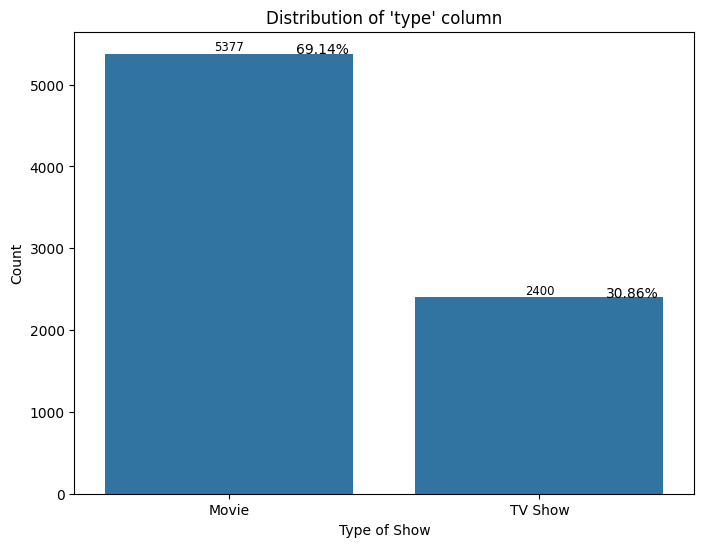

In [ ]:
count_plot(Netflix_df['type'],"Distribution of 'type' column",'Type of Show','Count')

##### 1. Why did you pick the specific chart?

**Count Plot** : As we are plotting a distribution of the 'type' column that has categorical varaibles with two distinct values : "Movie" and "TV Show". A count plot is an effective way to visually represent the frequency of each category in a categorical dataset. It provides a clear and straightforward depiction of the distribution, making it easy to compare the number of movies and TV shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

> <ul> <li> 69.14% of the dataset contain Movie records </li><li>  30.86% of the dataset contain TV Show records </li>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Since the count plot indicates a significant demand or popularity for a specific Movie, Netflix can use this information to customize its content acquisition strategy such as investing in acquiring or producing more high-quality movies could attract and retain subscribers.

**Negative Growth Consideration:**

As there is an imbalanced distribution, where Movie type vastly outnumbers the TV Show, it could potentially lead to negative growth. The overwhelming number of Movies  and sacrcity of TV show might disappoint a significant portion of the audience. This imbalance could impact user satisfaction and retention.

#### Chart - 2

>  <h3> <b> <font color ="#333">  Most prolific directors in terms of the number of movies or TV shows available on Netflix?  </div> </b>

In [ ]:
Director_Count = Netflix_df['director'].value_counts().reset_index() #storing the data as a dataframe
Director_Count.rename(columns = {'index':'Director','director':'No of TV Shows/Movies'}, inplace = True)
Top_Directors = Director_Count[(Director_Count['No of TV Shows/Movies'] >= 8) & (Director_Count['Director'] != 'Not Available') ]
Top_Directors

,Director,No of TV Shows/Movies
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Lance Bangs,8


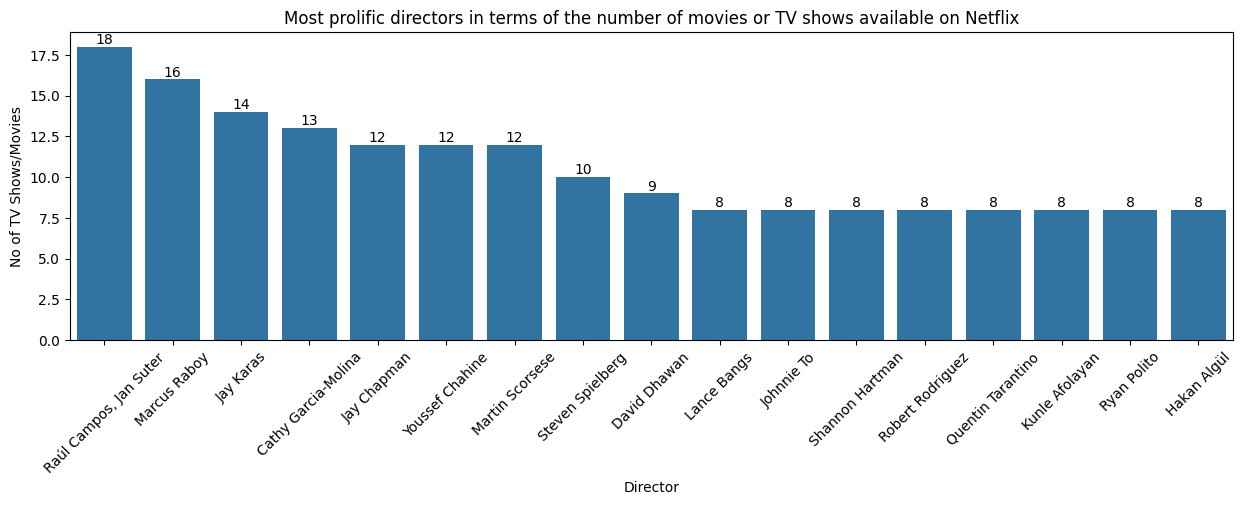

In [ ]:
# Chart - 2 visualization code

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

vis = sns.barplot(data=Top_Directors, x="Director", y="No of TV Shows/Movies")

vis.set_xticklabels(labels=Top_Directors['Director'], rotation=45)  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)

plt.title('Most prolific directors in terms of the number of movies or TV shows available on Netflix', fontsize=12, fontweight=0, loc='center' , style='normal' )


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Barplot :**  Barplot is well-suited for displaying and comparing the counts of different categories (in this case, directors). Each bar represents a director, and the height of the bar corresponds to the number of movies or TV shows they have on Netflix. This type of chart is effective in highlighting the variation in the contribution of different directors to the platform.

##### 2. What is/are the insight(s) found from the chart?

<ul> <li> Raúl Campos, Jan Suter has the most number of directed movies/TV shows (18) added in the Netflix </li>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

<ul> <li> By identifying the prolific directors will help Netflix in establishing and strengthening partnerships with successful content creators. Collaborating with directors who consistently produce popular content wil lead to a more engaging and satisfying user experience. It  would help Netflix secure exclusive deals, attracting subscribers who specifically enjoy content from these directors. </li> </ul>


**Negative Growth Consideration:**

<ul> <li> While a concentration of content from a few prolific directors may bring success, overreliance on a small number of creators could pose a risk. Hence if the platform becomes too dependent on a limited pool of directors, and may face challenges in diversifying its content offerings. A lack of diversity in content could lead to audience fatigue and reduced appeal to a broader audience with varied preferences.

#### Chart - 3

>  <h3> <b> <font color ="#333">Countries where more than 100 TV Shows/ Movies are produce  </div> </b>

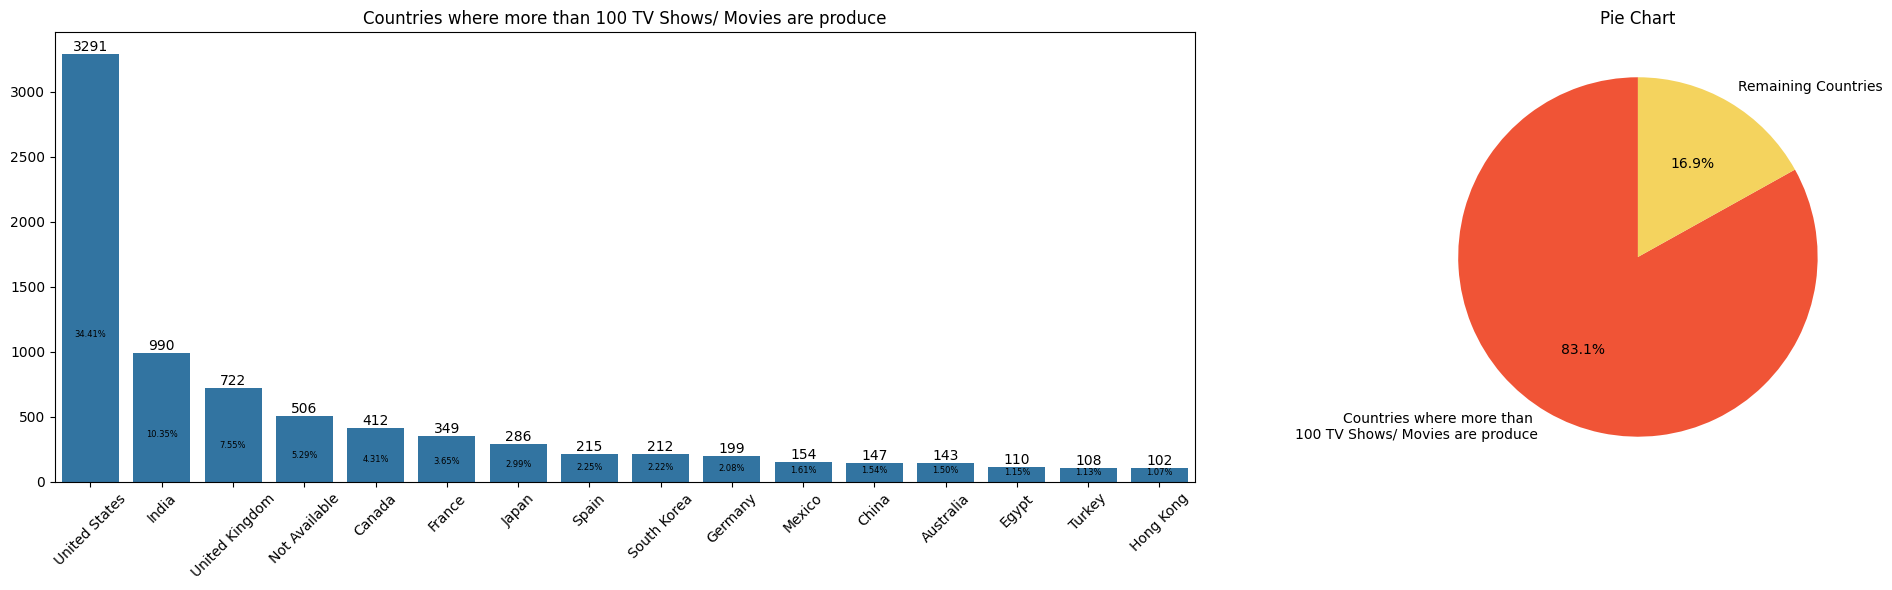

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

from collections import Counter

# Extract individual country names
country_list = [country.strip() for countries in Netflix_df['country'] for country in countries.split(',')]

# Count occurrences using Counter
country_counts = Counter(country_list)

#Countries where more than 100 TV Shows/ Movies are produce
Top10_country_count = {country:  count for country, count in country_counts.items() if count > 100}

#Reamining Countries
Remaining = {country:  count for country, count in country_counts.items() if count < 100}

# Sort the dictionary by values in descending order
Top10_country_count = dict(sorted(Top10_country_count.items(), key=lambda item: item[1], reverse=True))

# Convert the dictionary items to lists for plotting
countries = list(Top10_country_count.keys())
counts = list(Top10_country_count.values())



fig = plt.figure(figsize=(20,6))



gs = GridSpec(1, 2,  width_ratios=[5, 3])

# Bar plot
ax1 = plt.subplot(gs[0])
vis = sns.barplot( x= countries, y= counts)
vis.set_xticklabels(labels= countries , rotation=45)  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)

# Display percentages in middle of the bars
for p in vis.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height/3, f'{height/sum(country_counts.values()):.2%}', ha="center", va="bottom",fontsize=6)



ax1.set_title('Countries where more than 100 TV Shows/ Movies are produce')


# Pie chart

# Data for the pie chart
labels_pie = ['Countries where more than \n100 TV Shows/ Movies are produce','Remaining Countries']
values_pie = [sum(Top10_country_count.values()), sum(Remaining.values())]

palette_color = ['#F05436','#F4D35E']

ax2 = plt.subplot(gs[1])
ax2.pie(values_pie, labels=labels_pie, autopct='%1.1f%%', startangle=90, colors= palette_color)
ax2.set_title('Pie Chart')



# Adjust layout to prevent overlap
plt.tight_layout()


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Barplot :**  Barplot effectively displays the counts or frequencies of different categories. Each bar represents a country, and the height of the bar corresponds to the number of TV shows/movies produced in that country. This type of chart provides a clear visual comparison of production volumes across different countries.

##### 2. What is/are the insight(s) found from the chart?

<ul> <li> Countries where more than 100 TV Shows/ Movies are produce , contribute 83.1% in the Netflix dataset</li>
<li>34.41 % TV Shows/ Movies produced in United States  </li>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Identifying countries with high production volumes provides Netflix with opportunities to strategically invest in content from these regions. This will lead to a more diverse content library, catering to the preferences of viewers from different cultural backgrounds. It will as well help Netflix strengthen its global presence by offering a broad range of international content.

**Negative Growth Consideration:**

While focusing on high-producing countries is generally positive, overemphasizing content from specific regions this may lead to a lack of diversity in the platform's content offerings. Neglecting content from other regions would result in reduced appeal to a global audience with diverse tastes. It's crucial to strike a balance to avoid potential negative growth associated with limiting the platform's appeal.

#### Chart - 4

>  <h3> <b> <font color ="#333">Distribution of movie and TV show releases over the years on Netflix </div> </b>

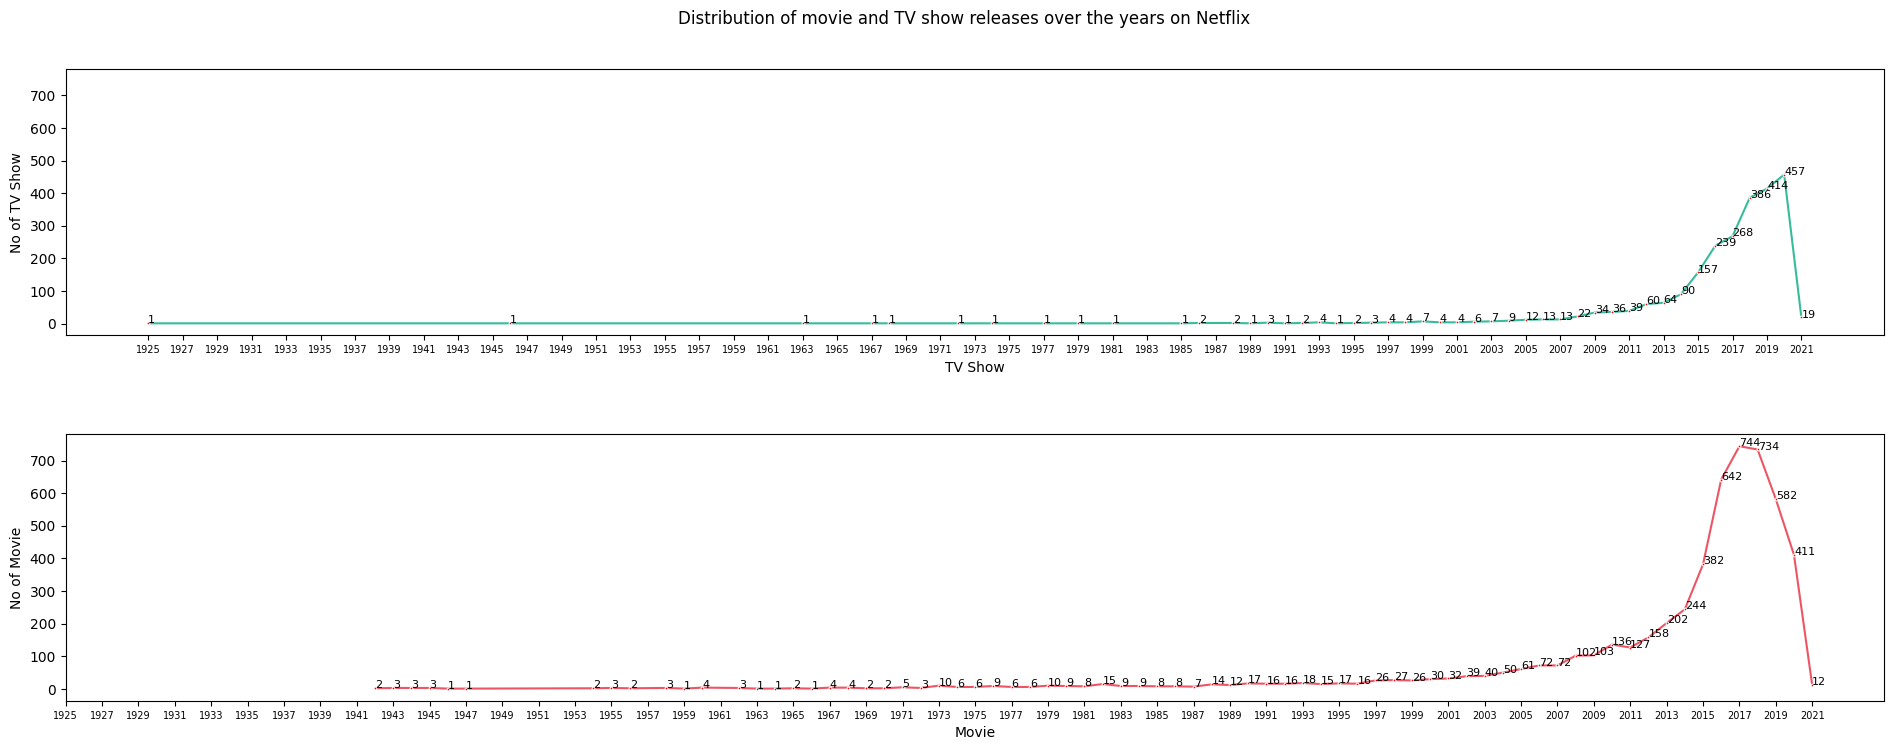

In [ ]:
# Chart - 4 visualization code

#Grouping the data by type of TV Show and Movie
Year_grpby = Netflix_df.groupby(['type','release_year']).aggregate({'release_year':'count'})
Year_grpby.rename(columns= {'release_year':'count'},inplace=True)
Year_grpby.reset_index(drop = False, inplace= True)

fig, axes = plt.subplots(2, 1, figsize=(20,8), sharey=True) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Distribution of movie and TV show releases over the years on Netflix')


i = 0
color = ['#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = Year_grpby[Year_grpby['type'] ==  n]
  plot1 = sns.lineplot(ax=axes[i], data = typ, x = 'release_year',y='count' , marker='o', markersize=2, markerfacecolor='red' , color = color[i])

  #Labling values on the top of the lines
  for m, txt in enumerate(typ['release_year']):
     plot1.text(typ['release_year'].iloc[m], typ['count'].iloc[m], str(typ['count'].iloc[m]) , fontsize = 8)
  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)

  i = i+ 1

# Set the x-axis interval to 5 for both subplots
for ax in axes:
    ax.set_xticks(range(min(Year_grpby['release_year']), max(Year_grpby['release_year']) + 1, 2))
    ax.tick_params(axis='x', labelsize=7)  # Adjust the font size

plt.show()

##### 1. Why did you pick the specific chart?

**Line plot :** For visualizing the distribution of movie and TV show releases over the years on Netflix , a line plot effectively illustrates trends and patterns in a continuous dataset, such as the temporal distribution of releases. Each line represents either movies or TV shows, and the x-axis represents the years. This type of chart is well-suited for showing how the number of releases has changed over time.

##### 2. What is/are the insight(s) found from the chart?

1. The line plot helps in identifying that there is steady increase in movies/TV shows released after 2005.
2. The peaks and valleys in the line plot  indicates periods of high or low content production thus giving a brief idea about audience preference

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Identifying trends in the distribution of releases over the years will assist Netflix in optimizing its content strategy. As  there is a noticeable increase in the production of a certain type of content during specific years, Netflix would help in leverage this information to capitalize on trends and meet viewer demand more effectively.

**Negative Growth Consideration:**

The line plot doesn't reveal any declining trend in content releases over recent years, hence there are no negative growth considerations.

#### Chart - 5

><h3> <b> <font color ="#333"> Overall distribution of ratings for Netflix content </div> </b> </div> </b>

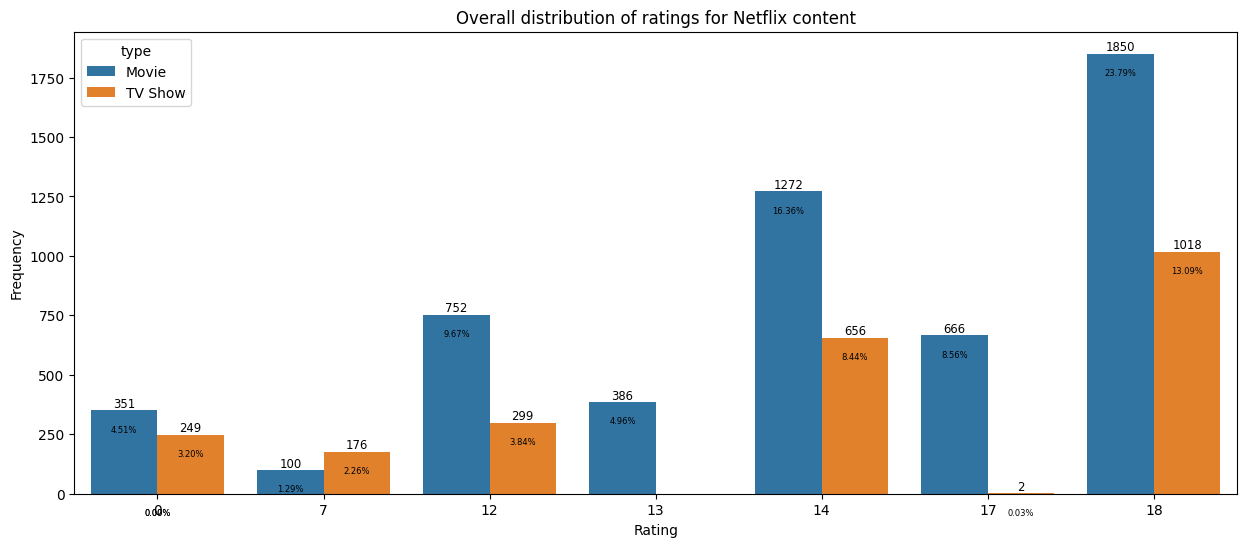

In [ ]:
# Chart - 5 visualization code

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Create a histogram
plot5 = sns.countplot(data = Netflix_df, x='rating',hue = 'type' )

#Display count values each bar
for container in plot5.containers:
    plot5.bar_label(container, size='small')

# Display percentages in middle of the bars
for p in plot5.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height - 100, f'{height/len(Netflix_df):.2%}', ha="center", va="bottom",fontsize=6)


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall distribution of ratings for Netflix content')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Count Plot :** Count Plot is particularly effective for displaying the frequency or count of categorical data. In this case, the ratings are likely discrete categories (e.g., PG, PG-13, TV-MA), and the Count Plot as well provide  clear and concise way to showcase the distribution of these categories

##### 2. What is/are the insight(s) found from the chart?

<ul><li>The dataset contains 37.88%  Rating 18 (TV-MA) TV Shows(23.79%) and Movies (13.09%). </li>
<li>The dataset contains only 7.71%  Rating 0 (NR ,TV-G,TV-Y,G) TV Shows(4.51%) and Movies (3.20%)  </li>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Understanding the distribution of ratings will help Netflix to customize its content recommendations more accurately. If certain ratings are more prevalent, the platform will refine its algorithms and provide users with personalized suggestions aligned with their preferences.

**Negative Growth Consideration:**

As there is a concentration of content in a specific rating category and a lack of diversity in ratings, this will limit Netflix's appeal to a broader audience. Since the majority of content is rated for mature audiences (TV-MA), this would exclude younger viewers or families, potentially leading to negative growth among these demographics. To ensure sustained growth, Netflix needs to maintain a balanced and diverse content library that caters to a wide range of viewer preferences.

#### Chart - 6

><h3> <b> <font color ="#333"> Most common genres/categories of content available on Netflix </div> </b> </div> </b>

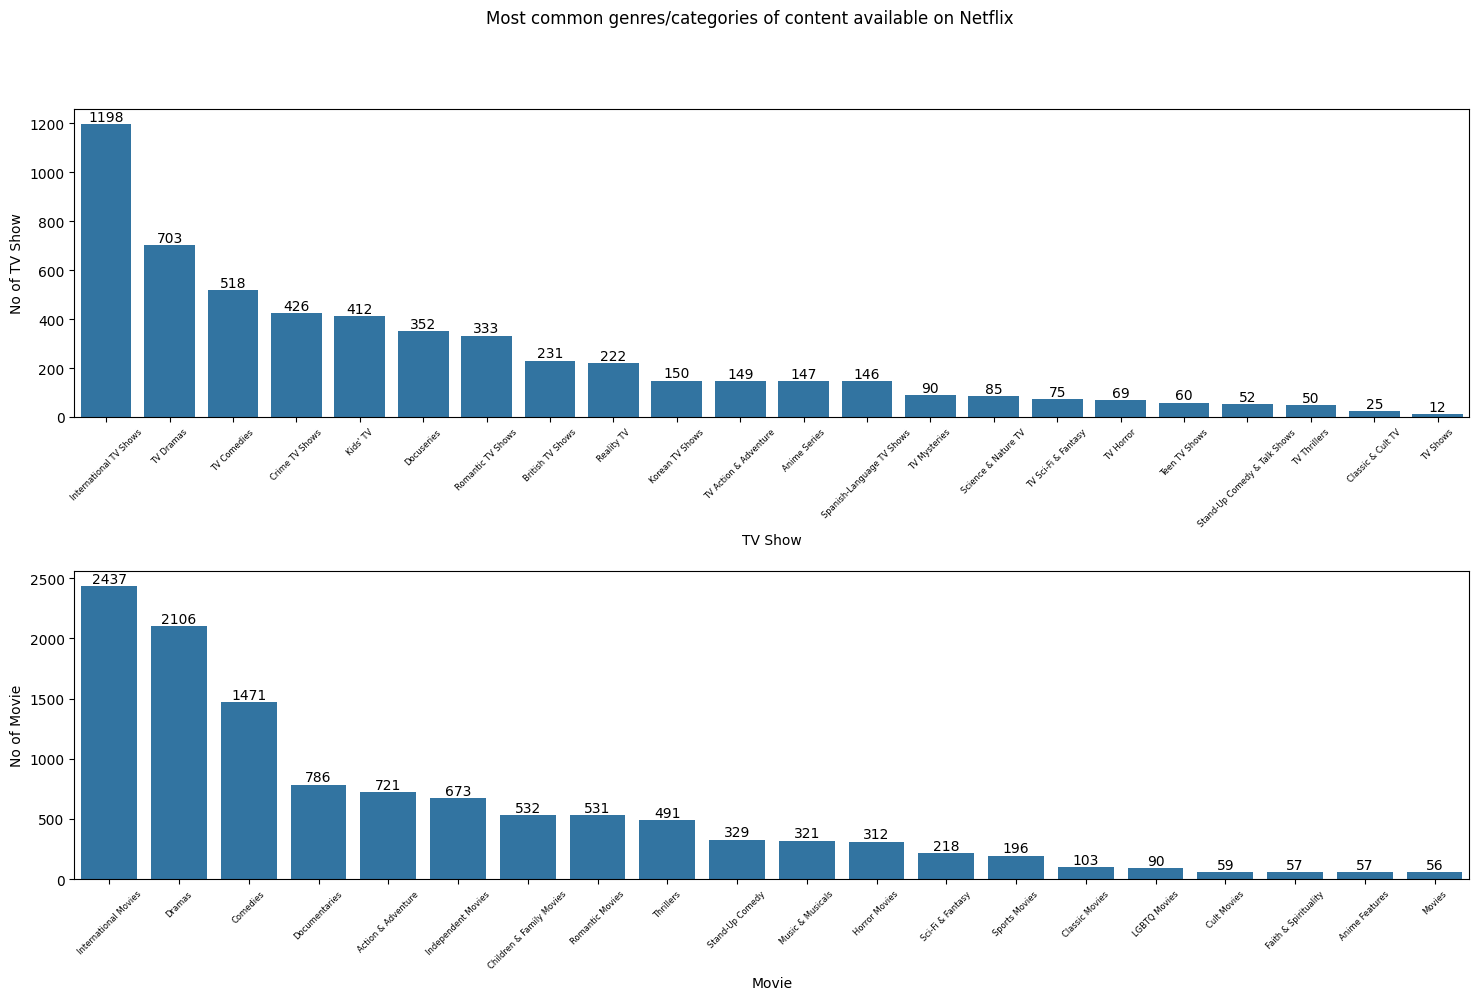

In [ ]:
# Chart - 6 visualization code

def Count_func( col):
  # Extract individual element names
  lst = [country.strip() for countries in col for country in countries.split(',')]

  # Count occurrences using Counter
  counts = Counter(lst)
  count_dict = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
  return counts


fig, axes = plt.subplots(2, 1, figsize=(18,10)) #displaying two subplots in a same plot


i = 0
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]

  genre_count = Count_func( typ['listed_in'])
  count_dict = dict(sorted(genre_count.items(), key=lambda item: item[1], reverse=True))

  # Convert the dictionary items to lists for plotting
  genre = list(count_dict.keys())
  count = list(count_dict.values())

  plot1 = sns.barplot(ax=axes[i], x= genre, y= count)

  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)
  plot1.set_xticklabels(labels= genre , rotation=45)  #rotaating X_labels


  # Adjust x-axis label size
  plot1.tick_params(axis='x', labelsize=6)
  plot1.bar_label(plot1.containers[0])

  i = i+ 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Most common genres/categories of content available on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot :**  Bar plot is well-suited for displaying the counts or frequencies of different categories. Each bar represents a genre or category, and the height of the bar corresponds to the number of movies or TV shows within that genre. This type of chart provides a straightforward and easily interpretable view of the distribution of genres.

##### 2. What is/are the insight(s) found from the chart?

**Identifying Dominant Genres:** The bar plot allows us to quickly identify the most common genres or categories of content i.e International Movies and International TV Shows  on Netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Understanding the most common genres will help Netflix optimize its content strategy and align its the content library with the preferences of the majority of viewers, the platform will enhance user satisfaction, increase engagement, and potentially attract new subscribers.

**Negative Growth Consideration:**

If the content library is heavily skewed towards a few genres and lacks diversity, it may limit the platform's appeal to a broader audience. For example, if only a specific genre dominates, viewers with different tastes may feel underserved, leading to negative growth among those demographics. To ensure sustained growth, Netflix needs to continually assess and adapt its content library to cater to a diverse range of viewer preferences.

#### Chart - 7

><h3> <b> <font color ="#333"> Distribution of movie and TV show durations on Netflix </div> </b> </div> </b>

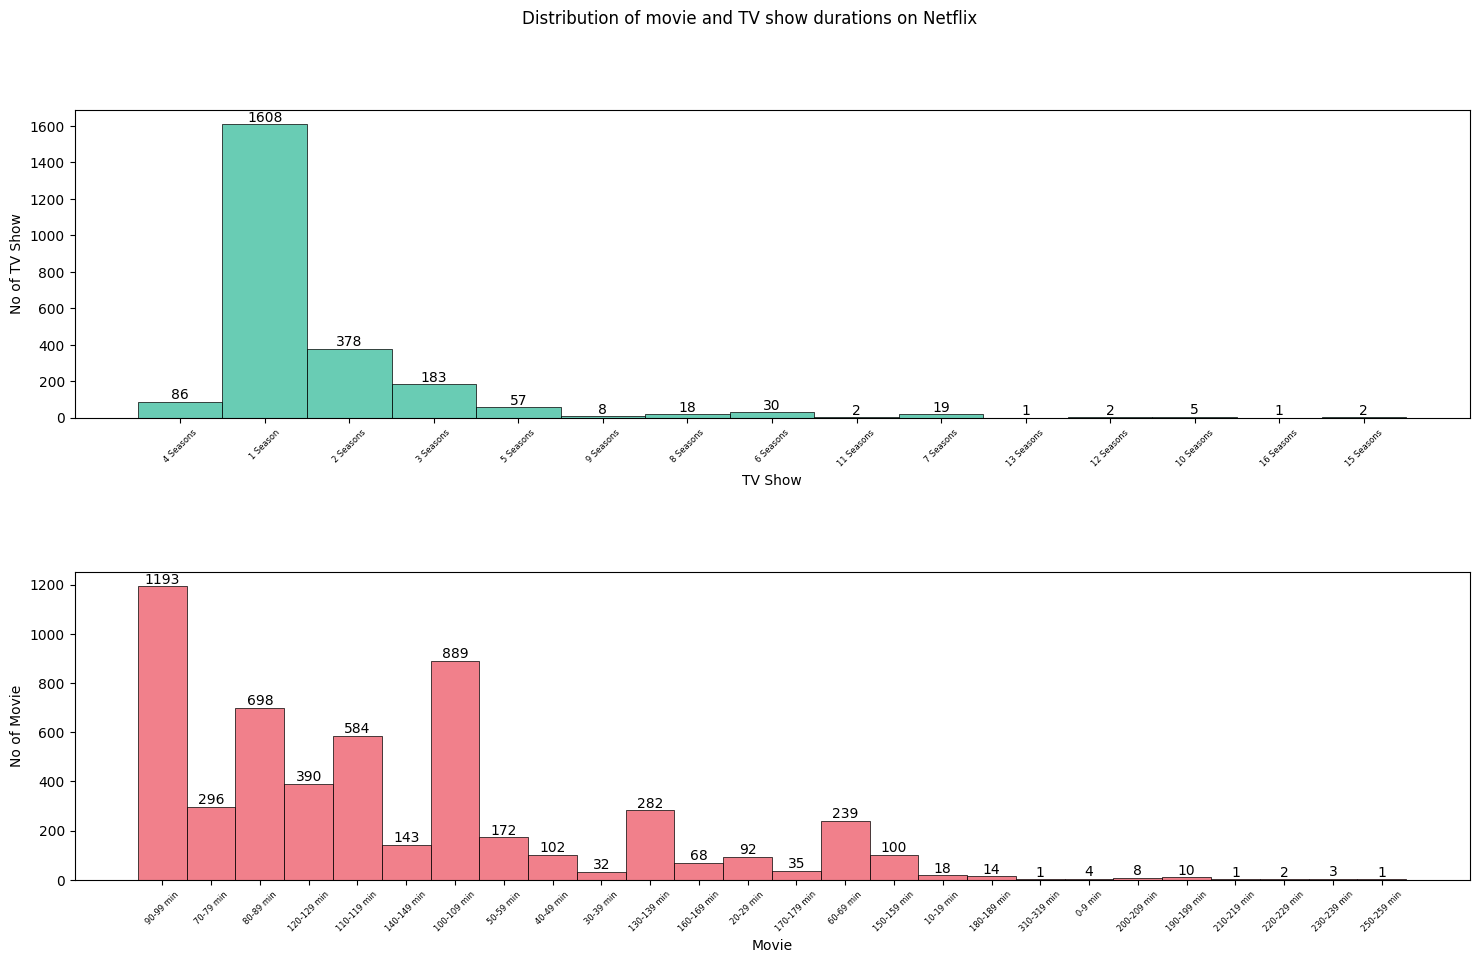

In [ ]:
# Chart - 7 visualization code
fig, axes = plt.subplots(2, 1, figsize=(18,10)) #displaying two subplots in a same plot

i = 0
color = ['#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]
  plot1 = sns.histplot(ax=axes[i],data = typ, x= 'duration2' ,bins = 10,element='bars', color = color[i], linewidth=0.5)

  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)

  # Rotate x-axis labels for the plot
  axes[i].tick_params(axis='x', rotation=45)

  # Adjust x-axis label size
  plot1.tick_params(axis='x', labelsize=6)
  plot1.bar_label(plot1.containers[0])

  i = i+ 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of movie and TV show durations on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

><h3> <b> <font color ="#333"> Average Rating of Netflix content  over different release years </div> </b> </div> </b>

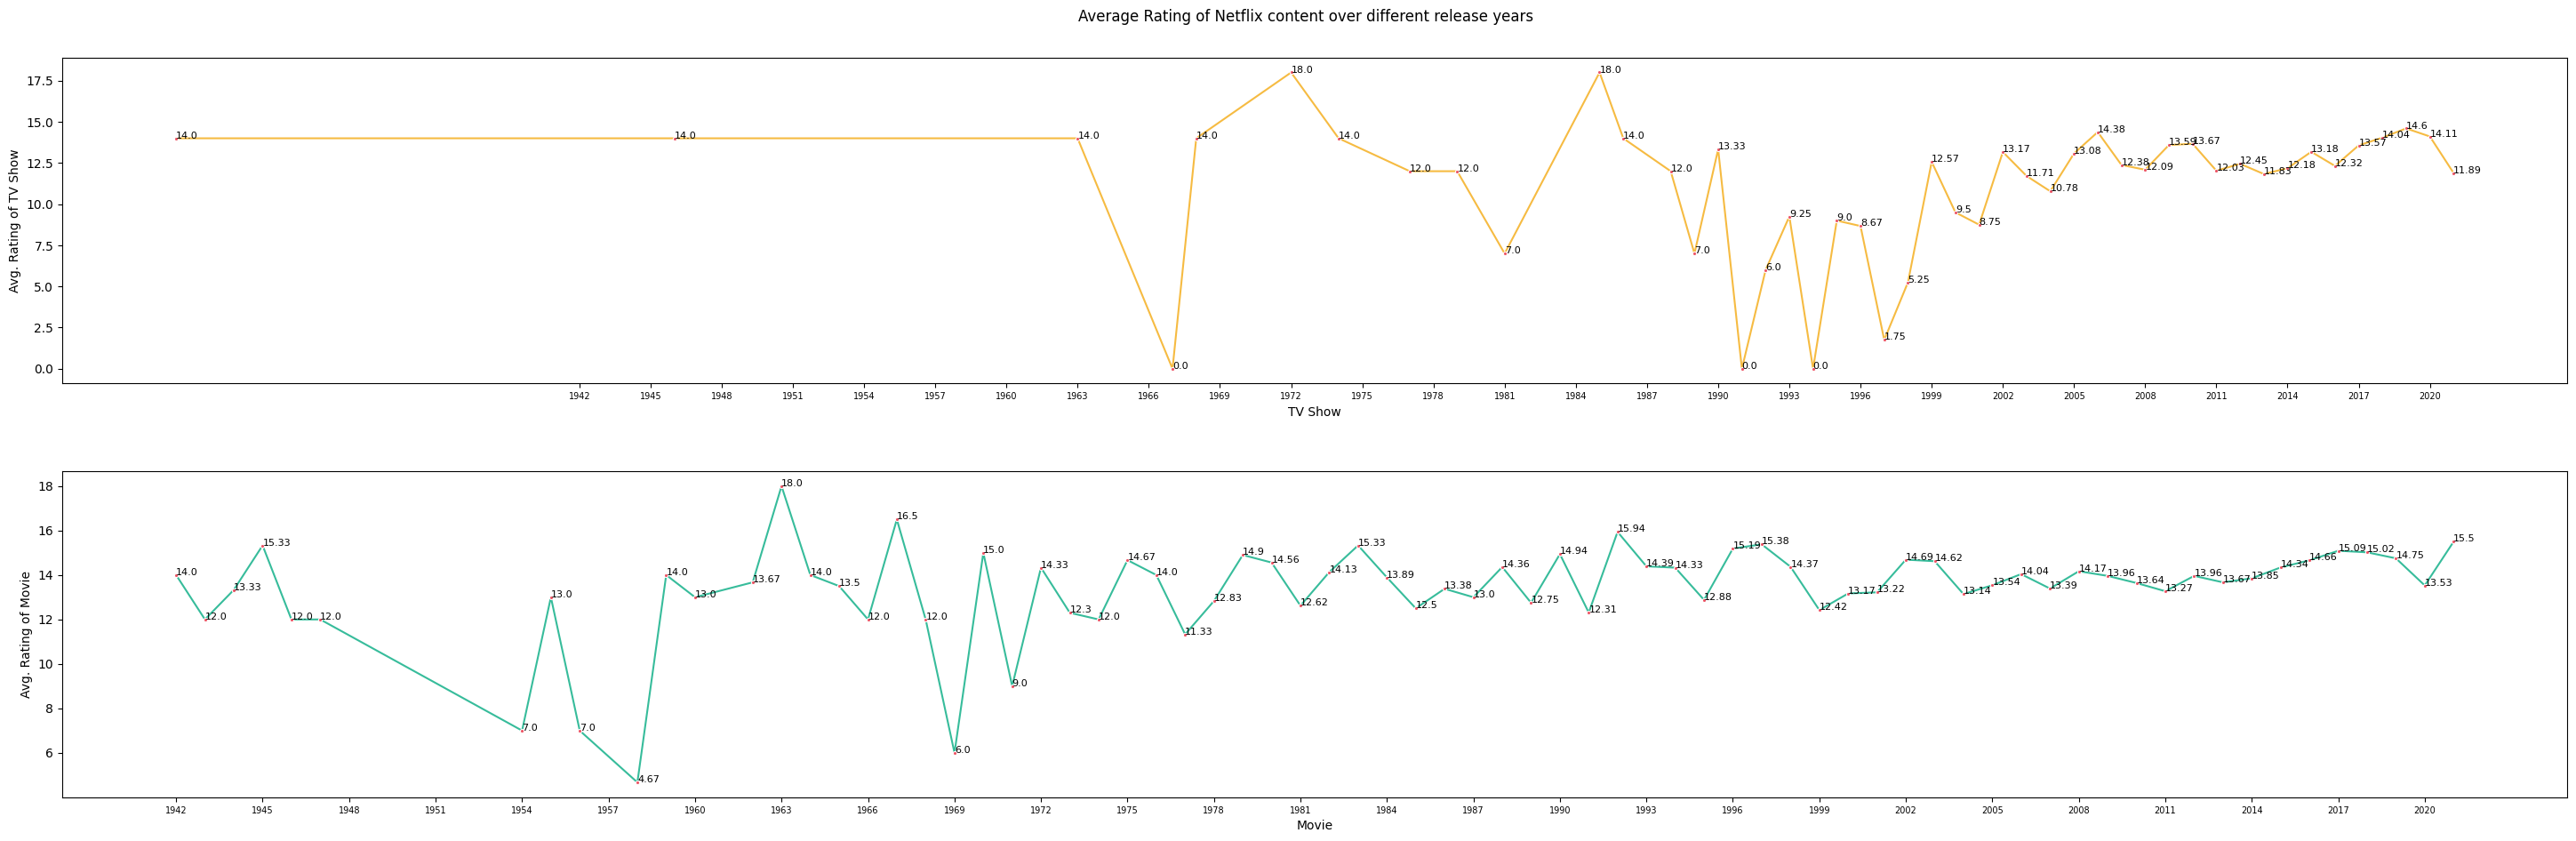

In [ ]:
# Chart - 8 visualization code


# Calculate the average rating for each year
average_ratings = Netflix_df.groupby(['type','release_year'])['rating'].mean().reset_index()

# Round the mean values to the first digit after the decimal point
average_ratings['rating'] = average_ratings['rating'].round(2)

fig, axes = plt.subplots(2, 1, figsize=(30,10)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Average Rating of Netflix content over different release years')


i = 0
color = ['#F6BB42','#37BC9B']
for n in Netflix_df['type'].unique():
  typ = average_ratings[average_ratings['type'] ==  n]

  plot1 = sns.lineplot(ax=axes[i], data = typ, x = 'release_year',y='rating' , marker='o', markersize=3, markerfacecolor='#ED5565' ,color = color[i] )

  #Labling values on the top of the lines
  for m, txt in enumerate(typ['release_year']):
     plot1.text(typ['release_year'].iloc[m], typ['rating'].iloc[m], str(typ['rating'].iloc[m]) , fontsize = 8)
  plot1.set_xlabel(n)
  plot1.set_ylabel("Avg. Rating of " + n)

  i = i+ 1

# Set the x-axis interval to 5 for both subplots
for ax in axes:
    ax.set_xticks(range(min(typ['release_year']), max(typ['release_year']) + 1, 3))
    ax.tick_params(axis='x', labelsize=7)  # Adjust the font size

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

><h3> <b> <font color ="#333"> Correlation between content duration and viewer ratings</div> </b> </div> </b>

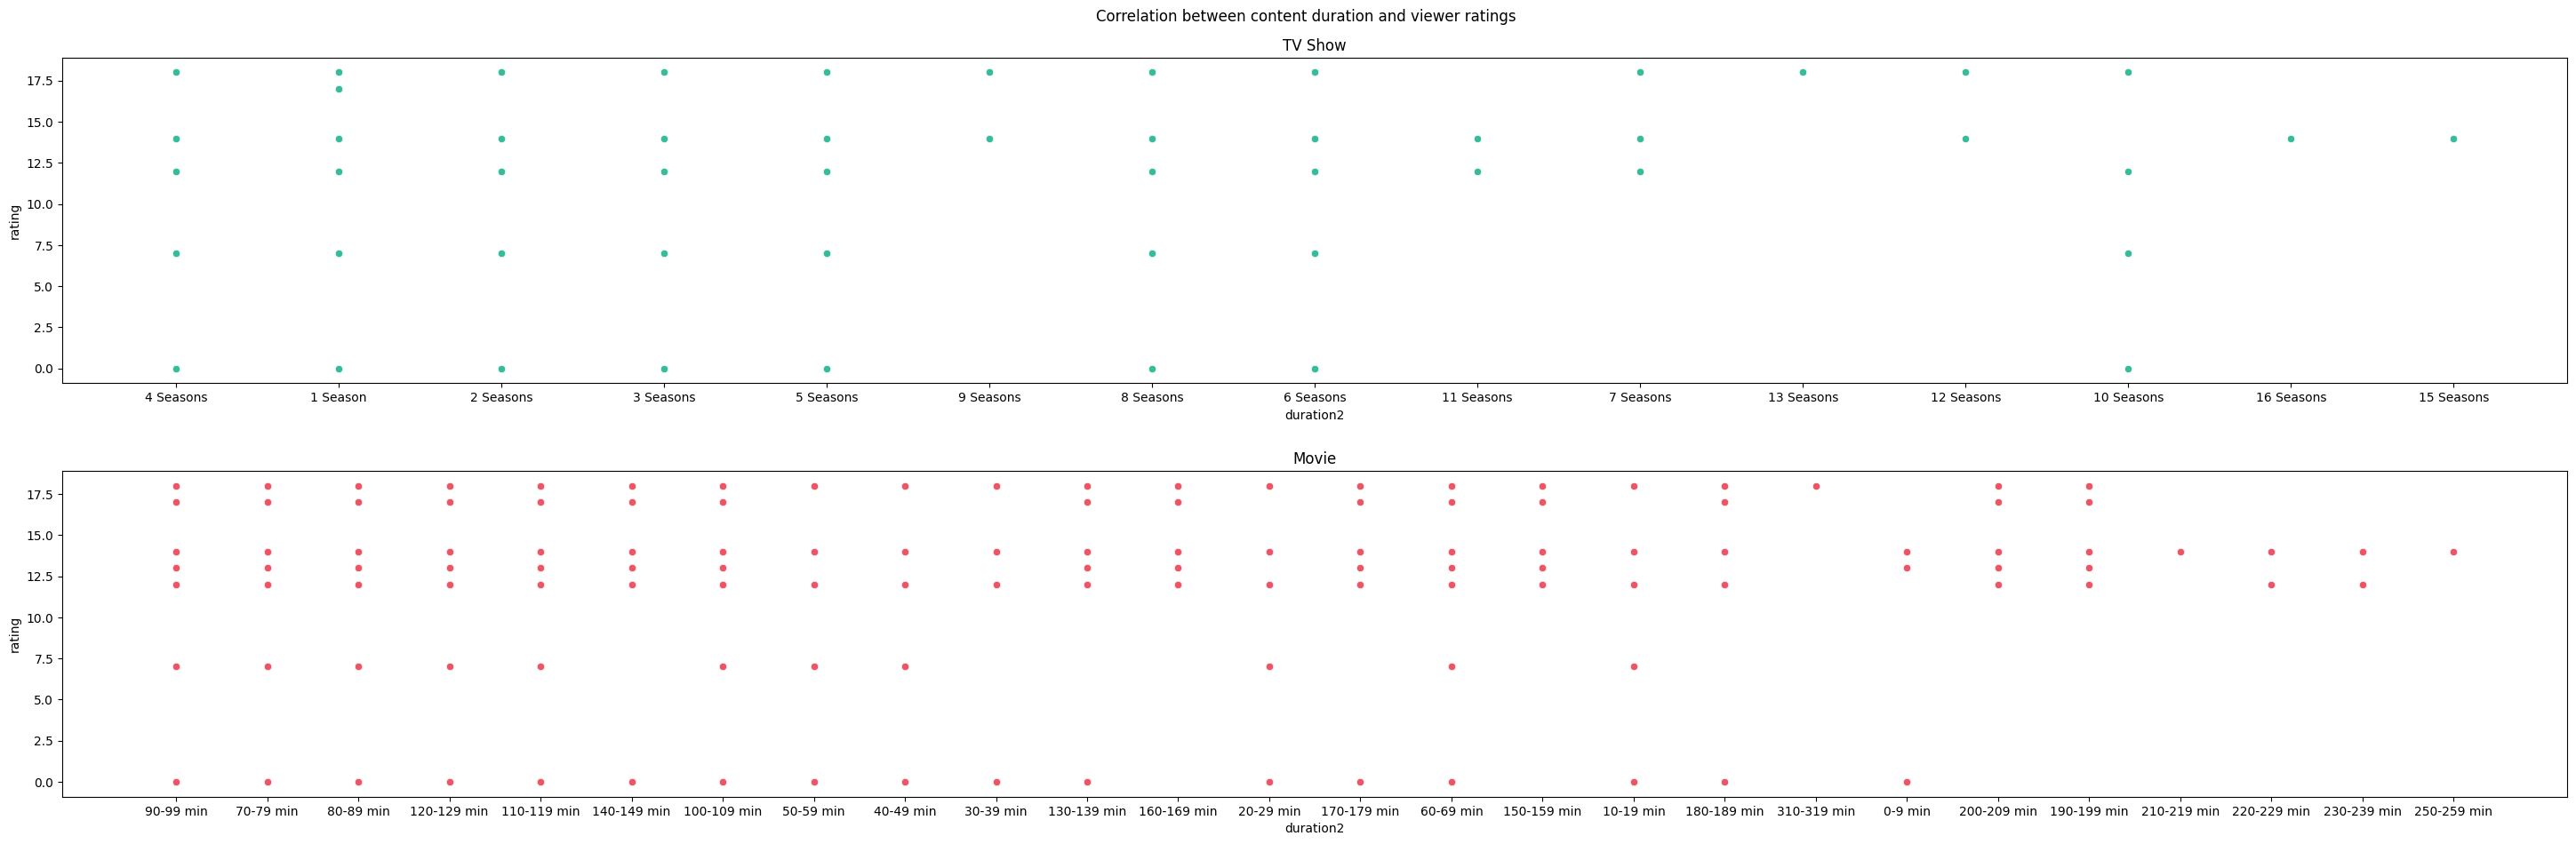

In [ ]:
# Chart - 9 visualization code

fig, axes = plt.subplots(2, 1, figsize=(30,10)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Correlation between content duration and viewer ratings')


i = 0
color = ['#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]

  plot1 = sns.scatterplot(ax=axes[i], data = typ, x = 'duration2',y='rating', color = color[i])
  axes[i].set_title(n)

  i = i+ 1


plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

><h3> <b> <font color ="#333"> How has the average duration of movies and TV shows changed over the years?


In [ ]:
import math

#function to extract the numeric part from the duration column
def extract_num(value):
  num = value.split(' ')
  return num[0]

#function to return floor value if decimal value is less than .5 and ceil value if decimal value is more than .5
def floor_ceil(value):
  a = str(value).split('.')

  if int(a[1]) < 5 :
    return math.floor(value)
  else :
    return math.floor(value)


# Selectign the necessary columns
Avg_Year_Data = Netflix_df[['type','duration','release_year']]
Avg_Year_Data['duration'] = Avg_Year_Data['duration'].apply(extract_num)

# Convert the 'duration' column to integer
Avg_Year_Data['duration'] = Avg_Year_Data['duration'].astype('Int64')

# Create a pivot table to calculate the average duration year-wise for each type
pivot_table = Avg_Year_Data.pivot_table(values='duration', index='release_year', columns='type', aggfunc='mean')
pivot_table= pivot_table.reset_index()

#Replacing NA with Zero if any are present
pivot_table['Movie'] = pivot_table['Movie'].fillna(0)
pivot_table['TV Show'] = pivot_table['TV Show'].fillna(0)

#

# Round the mean values to the first digit after the decimal point
pivot_table['Movie'] =   pivot_table['Movie'].round(1)
pivot_table['TV Show'] = pivot_table['TV Show'].round(1)

# Round the mean values to the first digit after the decimal point
pivot_table['Movie'] =   pivot_table['Movie'].apply(floor_ceil)
pivot_table['TV Show'] = pivot_table['TV Show'].apply(floor_ceil)


pivot_table

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,35,0
2,1943,62,0
3,1944,52,0
4,1945,51,0
...,...,...,...
68,2017,94,1
69,2018,96,1
70,2019,93,1
71,2020,89,1


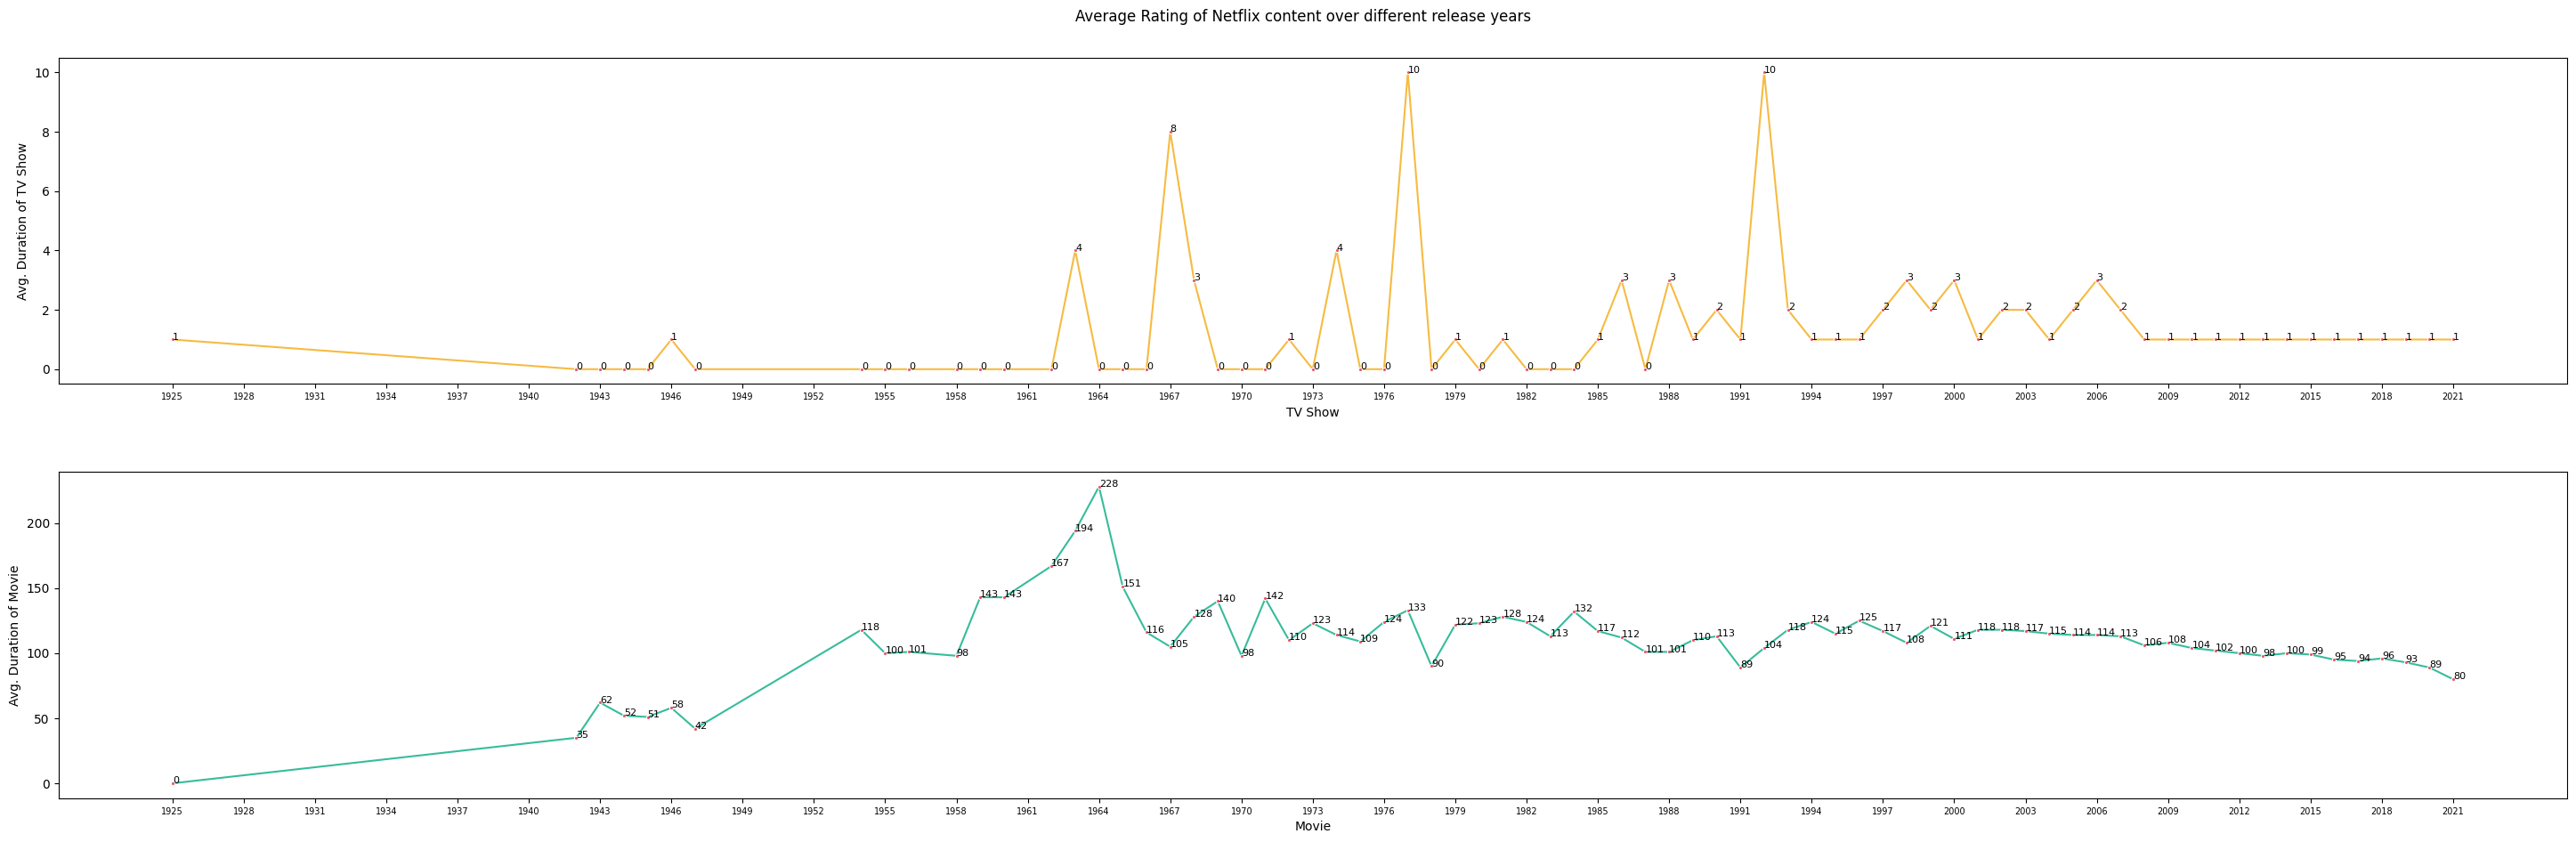

In [ ]:
# Chart - 10 visualization code


fig, axes = plt.subplots(2, 1, figsize=(30,10)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Average Rating of Netflix content over different release years')


i = 0
color = ['#F6BB42','#37BC9B',]
for n in Netflix_df['type'].unique():

  plot1 = sns.lineplot(ax=axes[i], data = pivot_table, x = 'release_year',y= n , marker='o', markersize=3, markerfacecolor='#ED5565' ,color = color[i] )

  #Labling values on the top of the lines
  for m, txt in enumerate(pivot_table['release_year']):
    plot1.text(pivot_table['release_year'].iloc[m], pivot_table[n].iloc[m], str(pivot_table[n].iloc[m]) , fontsize = 8)
  plot1.set_xlabel(n)
  plot1.set_ylabel("Avg. Duration of " + n)

  i = i+ 1

# Set the x-axis interval to 5 for both subplots
for ax in axes:
    ax.set_xticks(range(min(pivot_table['release_year']), max(pivot_table['release_year']) + 1, 3))
    ax.tick_params(axis='x', labelsize=7)  # Adjust the font size

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

><h3> <b> <font color ="#333"> Number of Shows added on different months in Netflix

In [ ]:
#Grouping the data by type, year and MonthName, in order to get the number of shows added every month and year
Year_grpby = Netflix_df.groupby(['type','Year','MonthName']).aggregate({'MonthName':'count'})
Year_grpby.rename(columns= {'MonthName':'count'},inplace=True)
Year_grpby.reset_index(drop = False, inplace= True)

# Define the custom order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'MonthName' column to a categorical type with the custom order
Year_grpby['MonthName'] = pd.Categorical(Year_grpby['MonthName'], categories=month_order, ordered=True)


Year_grpby = Year_grpby.sort_values(by=['Year','MonthName'])
Year_grpby

,type,Year,MonthName,count
0,Movie,2008,January,1
97,TV Show,2008,February,1
1,Movie,2009,May,1
2,Movie,2009,November,1
3,Movie,2010,November,1
...,...,...,...,...
173,TV Show,2020,November,55
86,Movie,2020,December,101
166,TV Show,2020,December,74
96,Movie,2021,January,88


In [ ]:
data = Year_grpby[(Year_grpby['Year'] == 2020) &(Year_grpby['type'] == 'Movie')]
Total_Emails =  data['count'].sum()
data

,type,Year,MonthName,count
88,Movie,2020,January,164
87,Movie,2020,February,71
91,Movie,2020,March,96
84,Movie,2020,April,130
92,Movie,2020,May,109
90,Movie,2020,June,119
89,Movie,2020,July,103
85,Movie,2020,August,83
95,Movie,2020,September,116
94,Movie,2020,October,117


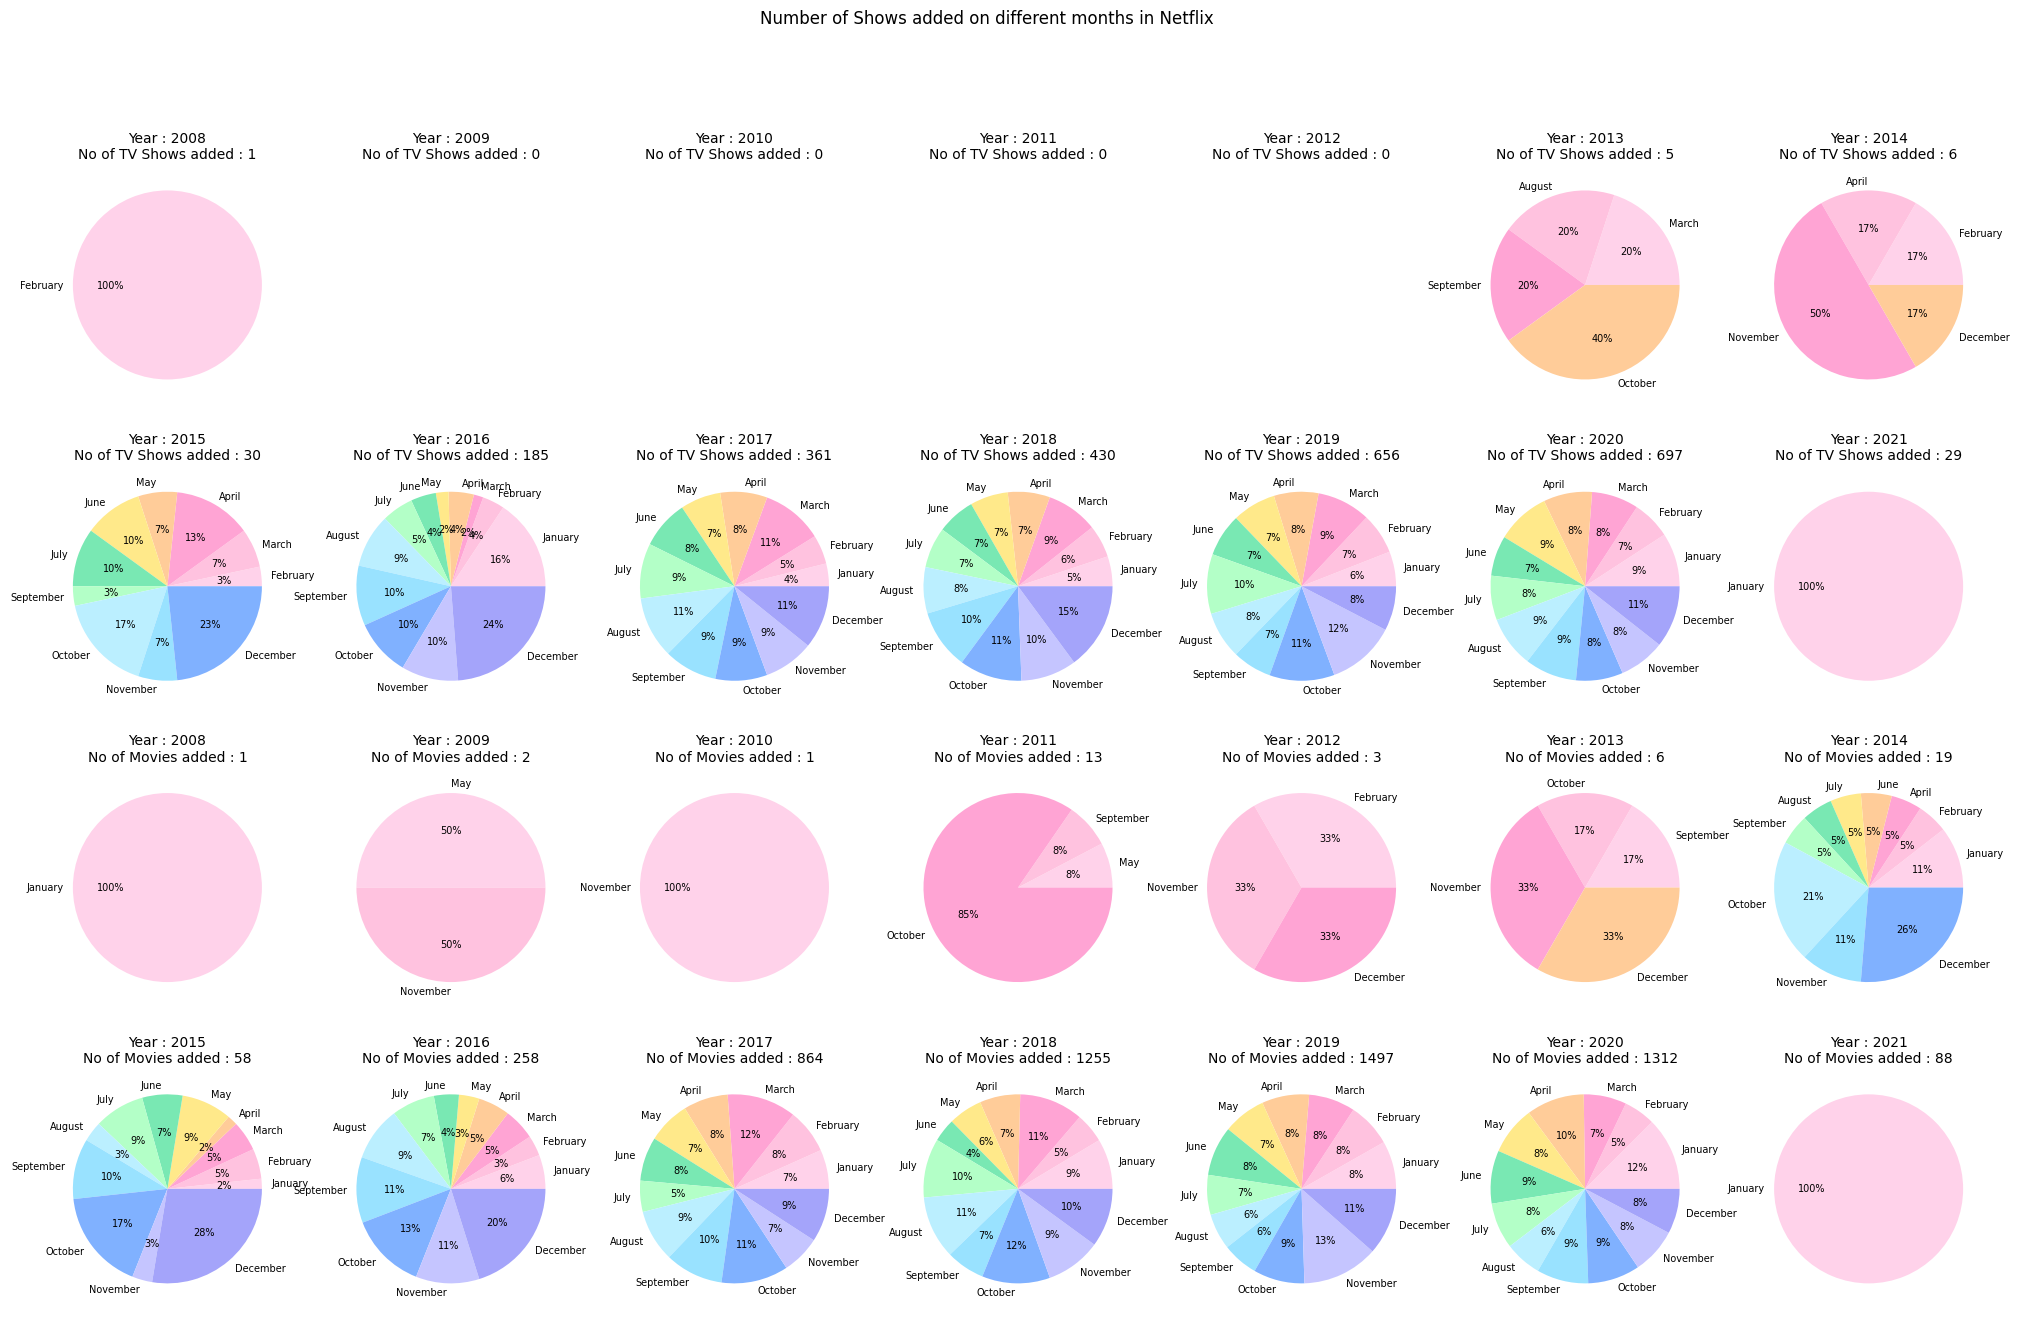

In [ ]:
# Chart - 11 visualization code

plt.figure(figsize=(25,15))
plt.tight_layout(pad=10.0)



# define Seaborn color palette to use
palette_color = ['#FFD2EA','#FFC2DF','#FFA4D4','#FFCC99','#FFE98A','#79E8B3','#B3FFC7','#BBEFFF','#99E2FF','#80B1FF','#C5C5FF','#A4A4FA']

plt.suptitle('Number of Shows added on different months in Netflix')

m = 0
for typ in Netflix_df['type'].unique():

  for n in Year_grpby['Year'].unique():
    data = Year_grpby[(Year_grpby['Year'] == n) &(Year_grpby['type'] == typ)]
    Total_Shows =  data['count'].sum()

    plt.subplot(4, 7, m+1)
    plt.pie(data['count'], labels=data['MonthName'], colors=palette_color, autopct='%.0f%%' , textprops = {"fontsize":7})

    plt.title("Year : " + str(n) + "\nNo of "+ typ +  "s added : " + str(Total_Shows) , fontsize = 10 )

    m = m+1


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.2)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

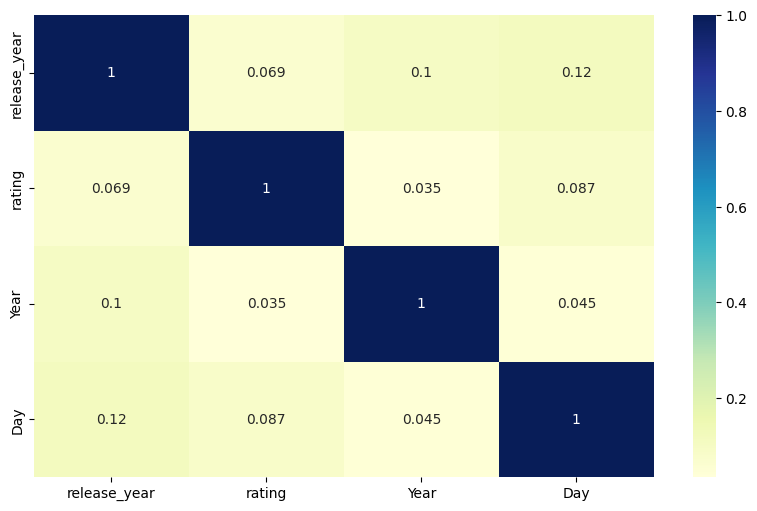

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(10, 6))
sns.heatmap(Netflix_df.corr(), cmap="YlGnBu", annot=True)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

<Figure size 1500x600 with 0 Axes>

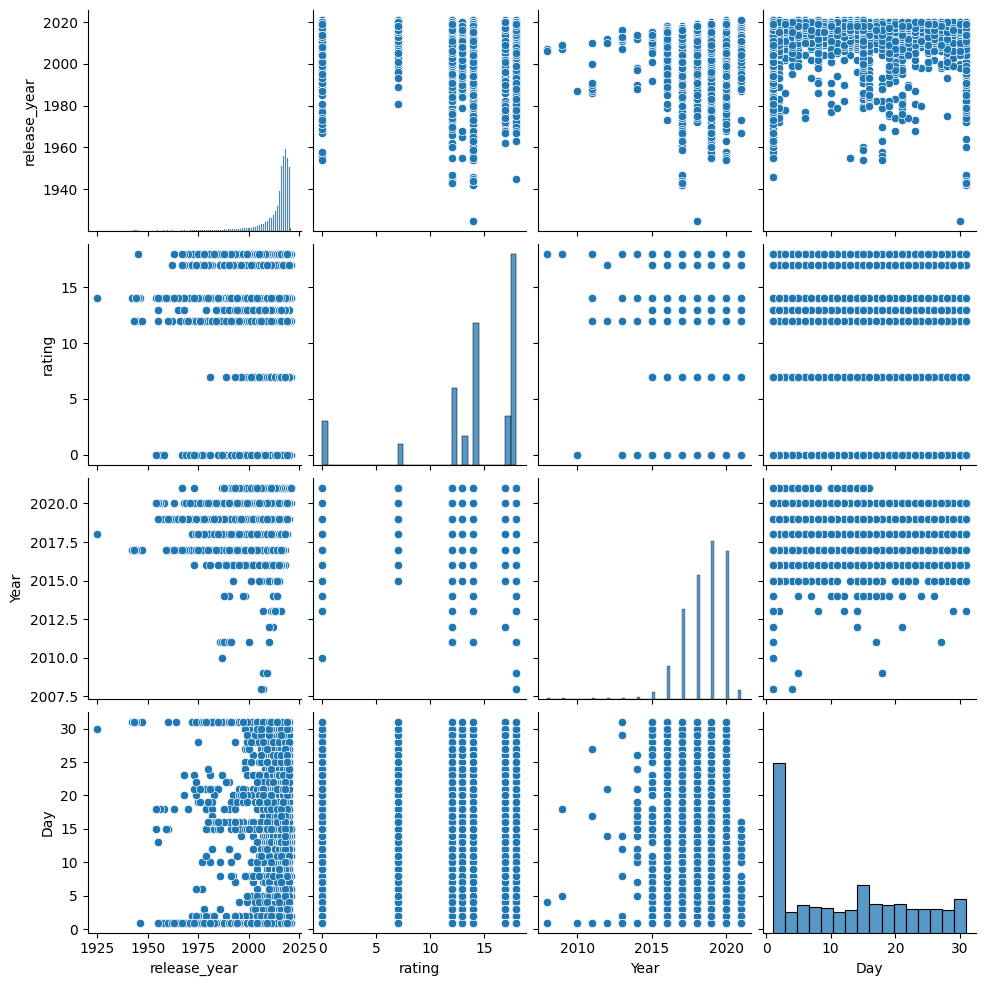

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(15, 6))
sns.pairplot(Netflix_df)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# All the missing values are updated in above code cells.

#### What all missing value imputation techniques have you used and why did you use those techniques?

> ##### **• rating** - replaced the null values with mode value of rating since  rating is a categorical column  
> ##### **•** Replaced missing values of **country , cast** and **directory** with Not Available
> ##### **• date_added** - date_added has only 10 records that contain null value and hence  dropped

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


# The dataset only contains Textvalues. Hence operation of handling outliers isn't required.

##### What all outlier treatment techniques have you used and why did you use those techniques?

> Maximum features of the dataset are text , hence the operation of handeling outliers isn't performed.

### 3. Categorical Encoding

In [ ]:
# For clustering using the original dataframe and replacing all the null columns with ''
Netflix_df2 = original_df.copy()
Netflix_df2.fillna('',inplace=True)

In [ ]:
Netflix_df2.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
Netflix_df2['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
rating_mapping = {'TV-MA': 18, 'R': 17, 'PG-13': 13, 'TV-14': 14, 'TV-PG': 12, 'NR': 0, 'TV-G': 0, 'TV-Y': 0, 'TV-Y7': 7, 'PG': 12, 'G': 0, 'NC-17': 17, 'TV-Y7-FV': 7, 'UR': 0}
Netflix_df2['rating'] = Netflix_df2['rating'].map(rating_mapping)

In [ ]:
Netflix_df2['rating'].unique()

array([18, 17, 13, 14, 12,  0,  7])

In [ ]:
Netflix_df2.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Encode your categorical columns

# Perform one-hot encoding using get_dummies
one_hot_encoded = pd.get_dummies(Netflix_df2['rating'], prefix='rating')
one_hot_encoded


# Concatenate the one-hot encoded columns with the original DataFrame
Netflix_df2 = pd.concat([Netflix_df2, one_hot_encoded], axis=1)

Netflix_df2 = Netflix_df2.drop(['rating'], axis=1)
Netflix_df2

,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating_0,rating_7,rating_12,rating_13,rating_14,rating_17,rating_18
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,0,0,0,0,0,1
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,0,0,0,0,0,1
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0,0,0,0,0,1,0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0,0,0,1,0,0,0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,A brilliant group of students become card-coun...,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,0,0,0,0,0,0,1
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,0,0,0,0,1,0,0
7784,Movie,Zulu Man in Japan,,Nasty C,,"September 25, 2020",2019,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",0,0,0,0,0,0,1
7785,TV Show,Zumbo's Just Desserts,,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,0,0,1,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

####**One-hot encoding**  
<hr>
<h5>One-hot encoding is a technique used to represent categorical variables as binary vectors. In this encoding scheme, each category is represented as a binary vector (array) with all zero values except for the index that corresponds to the category, which is marked with a 1. This encoding is particularly useful when working with machine learning algorithms that require numerical input, as it transforms categorical variables into a format that can be easily understood and processed by these algorithms.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions

In [ ]:
# import library
import contractions


def contraction_text(text):
  # creating an empty list
  expanded_words = []
  for word in text.split():

    # using contractions.fix to expand the shortened words
    expanded_words.append(contractions.fix(word))

  expanded_text = ' '.join(expanded_words)

  return expanded_text

Netflix_df2['description'] = Netflix_df2['description'].apply(contraction_text)
Netflix_df2['listed_in'] =  Netflix_df2['listed_in'].apply(contraction_text)
Netflix_df2['country'] =  Netflix_df2['country'].apply(contraction_text)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil,"João Miguel, Bianca Comparato, Michel Gomes, R...",,In a future where the elite inhabit an island ...
1,"Dramas, International Movies",Mexico,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Jorge Michel Grau,After a devastating earthquake hits Mexico Cit...
2,"Horror Movies, International Movies",Singapore,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Gilbert Chan,"When an army recruit is found dead, his fellow..."
3,"Action & Adventure, Independent Movies, Sci-Fi...",United States,"Elijah Wood, John C. Reilly, Jennifer Connelly...",Shane Acker,"In a postapocalyptic world, rag-doll robots hi..."
4,Dramas,United States,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Robert Luketic,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Lower Casing
from nltk.tokenize import word_tokenize

def lowercase_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Convert each word to lowercase
    lowercase_words = [word.lower() for word in words]

    # Join the lowercase words back into a sentence
    lowercase_text = ' '.join(lowercase_words)

    return lowercase_text



# Apply lowercasing

Netflix_df2['description'] = Netflix_df2['description'].apply(lowercase_text)
Netflix_df2['listed_in'] =  Netflix_df2['listed_in'].apply(lowercase_text)
Netflix_df2['country'] =  Netflix_df2['country'].apply(lowercase_text)
Netflix_df2['cast'] =  Netflix_df2['cast'].apply(lowercase_text)
Netflix_df2['director'] =  Netflix_df2['director'].apply(lowercase_text)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,"international tv shows , tv dramas , tv sci-fi...",brazil,"joão miguel , bianca comparato , michel gomes ...",,in a future where the elite inhabit an island ...
1,"dramas , international movies",mexico,"demián bichir , héctor bonilla , oscar serrano...",jorge michel grau,after a devastating earthquake hits mexico cit...
2,"horror movies , international movies",singapore,"tedd chan , stella chung , henley hii , lawren...",gilbert chan,"when an army recruit is found dead , his fello..."
3,"action & adventure , independent movies , sci-...",united states,"elijah wood , john c. reilly , jennifer connel...",shane acker,"in a postapocalyptic world , rag-doll robots h..."
4,dramas,united states,"jim sturgess , kevin spacey , kate bosworth , ...",robert luketic,a brilliant group of students become card-coun...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

def remove_punctuation(text):
    # Create a translation table for removing punctuation
    translator = str.maketrans("", "", string.punctuation)

    # Use translate to remove punctuation
    text_no_punct = text.translate(translator)

    return text_no_punct


Netflix_df2['description'] = Netflix_df2['description'].apply(remove_punctuation)
Netflix_df2['listed_in'] =  Netflix_df2['listed_in'].apply(remove_punctuation)
Netflix_df2['country'] =  Netflix_df2['country'].apply(remove_punctuation)
Netflix_df2['cast'] =  Netflix_df2['cast'].apply(remove_punctuation)
Netflix_df2['director'] =  Netflix_df2['director'].apply(remove_punctuation)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,international tv shows tv dramas tv scifi f...,brazil,joão miguel bianca comparato michel gomes r...,,in a future where the elite inhabit an island ...
1,dramas international movies,mexico,demián bichir héctor bonilla oscar serrano ...,jorge michel grau,after a devastating earthquake hits mexico cit...
2,horror movies international movies,singapore,tedd chan stella chung henley hii lawrence ...,gilbert chan,when an army recruit is found dead his fellow...
3,action adventure independent movies scifi ...,united states,elijah wood john c reilly jennifer connelly ...,shane acker,in a postapocalyptic world ragdoll robots hid...
4,dramas,united states,jim sturgess kevin spacey kate bosworth aar...,robert luketic,a brilliant group of students become cardcount...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls_digits(text):
    #  regex to remove URLs
    text_no_urls = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text)

     #  regex to remove words containing digits
    text_no_digits = re.sub(r'\b\w*\d\w*\b', '', text_no_urls)
    return text_no_digits


Netflix_df2['description'] = Netflix_df2['description'].apply(remove_urls_digits)
Netflix_df2['listed_in'] =  Netflix_df2['listed_in'].apply(remove_urls_digits)
Netflix_df2['country'] =  Netflix_df2['country'].apply(remove_urls_digits)
Netflix_df2['cast'] =  Netflix_df2['cast'].apply(remove_urls_digits)
Netflix_df2['director'] =  Netflix_df2['director'].apply(remove_urls_digits)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,international tv shows tv dramas tv scifi f...,brazil,joão miguel bianca comparato michel gomes r...,,in a future where the elite inhabit an island ...
1,dramas international movies,mexico,demián bichir héctor bonilla oscar serrano ...,jorge michel grau,after a devastating earthquake hits mexico cit...
2,horror movies international movies,singapore,tedd chan stella chung henley hii lawrence ...,gilbert chan,when an army recruit is found dead his fellow...
3,action adventure independent movies scifi ...,united states,elijah wood john c reilly jennifer connelly ...,shane acker,in a postapocalyptic world ragdoll robots hid...
4,dramas,united states,jim sturgess kevin spacey kate bosworth aar...,robert luketic,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

Stopwords = stopwords.words('english')
snowballsstemmer= SnowballStemmer('english')

def stop_words(paragraph):
  sentences = nltk.sent_tokenize(paragraph)

  sentences2 = []
  for i in range(len(sentences)):
   words = nltk.word_tokenize(sentences[i])
   words = [word for  word in words if word not in set(Stopwords)]
   txt = ' '.join(words)  #converting all the words into sentences

  return txt

Netflix_df2['description'] = Netflix_df2['description'].apply(stop_words)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,international tv shows tv dramas tv scifi f...,brazil,joão miguel bianca comparato michel gomes r...,,future elite inhabit island paradise far crowd...
1,dramas international movies,mexico,demián bichir héctor bonilla oscar serrano ...,jorge michel grau,devastating earthquake hits mexico city trappe...
2,horror movies international movies,singapore,tedd chan stella chung henley hii lawrence ...,gilbert chan,army recruit found dead fellow soldiers forced...
3,action adventure independent movies scifi ...,united states,elijah wood john c reilly jennifer connelly ...,shane acker,postapocalyptic world ragdoll robots hide fear...
4,dramas,united states,jim sturgess kevin spacey kate bosworth aar...,robert luketic,brilliant group students become cardcounting e...


In [ ]:
# Remove White spaces

def remove_white_spaces_regex(text):
    # Use regex to remove white spaces
    text_no_spaces = re.sub(r'\s', ' ', text)
    return text_no_spaces

Netflix_df2['description'] = Netflix_df2['description'].apply(remove_white_spaces_regex)
Netflix_df2['listed_in'] =  Netflix_df2['listed_in'].apply(remove_white_spaces_regex)
Netflix_df2['country'] =  Netflix_df2['country'].apply(remove_white_spaces_regex)
Netflix_df2['cast'] =  Netflix_df2['cast'].apply(remove_white_spaces_regex)
Netflix_df2['director'] =  Netflix_df2['director'].apply(remove_white_spaces_regex)


In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,international tv shows tv dramas tv scifi f...,brazil,joão miguel bianca comparato michel gomes r...,,future elite inhabit island paradise far crowd...
1,dramas international movies,mexico,demián bichir héctor bonilla oscar serrano ...,jorge michel grau,devastating earthquake hits mexico city trappe...
2,horror movies international movies,singapore,tedd chan stella chung henley hii lawrence ...,gilbert chan,army recruit found dead fellow soldiers forced...
3,action adventure independent movies scifi ...,united states,elijah wood john c reilly jennifer connelly ...,shane acker,postapocalyptic world ragdoll robots hide fear...
4,dramas,united states,jim sturgess kevin spacey kate bosworth aar...,robert luketic,brilliant group students become cardcounting e...


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
import random



def get_word_synonyms(word):
    # Get synonyms for a given word
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def rephrase_text_simple(input_text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(input_text)

    # Rephrase each sentence
    rephrased_sentences = []
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)

        # Replace words with synonyms
        for i in range(len(words)):
            word = words[i]
            synonyms = get_word_synonyms(word)
            if synonyms:
                # Use a random synonym for variety
                words[i] = random.choice(synonyms)

        # Join the words back into a sentence
        rephrased_sentence = ' '.join(words)
        rephrased_sentences.append(rephrased_sentence)

    # Join the rephrased sentences back into a text
    rephrased_text = ' '.join(rephrased_sentences)

    return rephrased_text


Netflix_df2['description'] = Netflix_df2['description'].apply(rephrase_text_simple)

In [ ]:
Netflix_df2[['listed_in','country','cast','director','description']].head(5)

,listed_in,country,cast,director,description
0,international tv shows tv dramas tv scifi f...,brazil,joão miguel bianca comparato michel gomes r...,,future elite_group inhabit island paradise FAR...
1,dramas international movies,mexico,demián bichir héctor bonilla oscar serrano ...,jorge michel grau,annihilating earthquake rack_up United_Mexican...
2,horror movies international movies,singapore,tedd chan stella chung henley hii lawrence ...,gilbert chan,regular_army recruit find perfectly lad soldie...
3,action adventure independent movies scifi ...,united states,elijah wood john c reilly jennifer connelly ...,shane acker,postapocalyptic world ragdoll robot veil fear ...
4,dramas,united states,jim sturgess kevin spacey kate bosworth aar...,robert luketic,brilliant grouping educatee become cardcountin...


#### 7. Tokenization

In [ ]:
# combining all the text data as single feature

Netflix_df2['text'] = (Netflix_df2['director'] + ' ' + Netflix_df2['cast'] +' ' + Netflix_df2['country'] +' ' + Netflix_df2['listed_in'] +' ' + Netflix_df2['description'])

In [ ]:
#before performing Tokenization , removing the non-ASCII characters

import re

def remove_non_ascii(text):



  # Use a regular expression to match non-ASCII characters
  non_ascii_pattern = re.compile('[^\x00-\x7F]+')

  # Remove non-ASCII characters from the text
  cleaned_text = non_ascii_pattern.sub('', text)

  return cleaned_text


Netflix_df2['text'] = Netflix_df2['text'].apply(remove_non_ascii)

In [ ]:
# Tokenization

from nltk.tokenize import word_tokenize


Netflix_df2['text'] = Netflix_df2['text'].apply(word_tokenize)

In [ ]:
Netflix_df2['text'].head()

0    [joo, miguel, bianca, comparato, michel, gomes...
1    [jorge, michel, grau, demin, bichir, hctor, bo...
2    [gilbert, chan, tedd, chan, stella, chung, hen...
3    [shane, acker, elijah, wood, john, c, reilly, ...
4    [robert, luketic, jim, sturgess, kevin, spacey...
Name: text, dtype: object

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# function to lemmatize the corpus
from nltk.stem import WordNetLemmatizer

# function for lemmatization
def lemmatization(words):

    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


# Use a lambda function to calculate the sum of columns A and B for each row
Netflix_df2['text'] = Netflix_df2['text'].apply(lemmatization)

In [ ]:
Netflix_df2['text'].head()

0    [joo, miguel, bianca, comparato, michel, gomes...
1    [jorge, michel, grau, demin, bichir, hctor, bo...
2    [gilbert, chan, tedd, chan, stella, chung, hen...
3    [shane, acker, elijah, wood, john, c, reilly, ...
4    [robert, luketic, jim, sturgess, kevin, spacey...
Name: text, dtype: object

##### Which text normalization technique have you used and why?

**Lemmatization**

Lemmatization is a linguistic and natural language processing (NLP) technique that involves reducing words to their base or root form, known as the lemma. The main goal of lemmatization is to group together different inflected forms of a word so that they can be analyzed or processed as a single, common base form.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

# For Building Clustering Model POS Tagging is not necessary.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text


from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized and lemmatized documents back to text
text_after_lemmatization = [' '.join(tokens) for tokens in Netflix_df2['text']]


# Create the TfidfVectorizer object using top 20000 features
tfidf_vectorizer = TfidfVectorizer( stop_words='english', lowercase=False, max_features = 20000)


# Fit and transform the documents
X_tfidf = tfidf_vectorizer.fit_transform(text_after_lemmatization)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the resulting TF-IDF matrix
print(X_tfidf.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.25936793 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
X_tfidf.shape

(7787, 20000)

In [ ]:
# Creating a datafram for the Text Vector

column_names = [i for i in feature_names]
X_tfidf = pd.DataFrame(data = X_tfidf.toarray(), columns = column_names)
X_tfidf.head(5)

,10,100,1000000,14,15,1st,20,24,2nd,60_minutes,...,zumbo,zurer,zurita,zurzolo,zutshi,zwart,zygmunt,zylberberg,zyldz,zylka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_tfidf.shape , Netflix_df2.shape

((7787, 20000), (7787, 18))

In [ ]:
final_df = pd.concat([X_tfidf , Netflix_df2[['rating_0',	'rating_7',	'rating_12',	'rating_13'	,'rating_14'	,'rating_17'	,'rating_18']] ],axis =1)
final_df.head()

,10,100,1000000,14,15,1st,20,24,2nd,60_minutes,...,zylberberg,zyldz,zylka,rating_0,rating_7,rating_12,rating_13,rating_14,rating_17,rating_18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# within TF-idf we have already manipulated the features and created 2000 new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# In Text Vectorization the top 20000 features are already selected

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Data Transformation is not required as the data is already preprocessed in above cells.

### 6. Data Scaling

In [ ]:
# Scaling your data

# Multiple Features present in the dataset are Tet ,hence

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
final_df.isnull().sum()

10           0
100          0
1000000      0
14           0
15           0
            ..
rating_12    0
rating_13    0
rating_14    0
rating_17    0
rating_18    0
Length: 20007, dtype: int64

In [ ]:
# Dimensionality Reduction (If needed)
from sklearn.decomposition import PCA


#  PCA for reducing dimension
pca = PCA(random_state=50)
pca.fit(final_df)

PCA(random_state=50)

In [ ]:
# transformed features
final_df_pca = pca.transform(final_df)

In [ ]:
# Save the transformed matrix to a CSV file

# Create a new DataFrame with the transformed matrix
#transformed_df = pd.DataFrame(data=final_df_pca)

#transformed_df.to_csv(path+'/pca_result.csv', index=False)

In [ ]:
# shape of transformed vectors
final_df_pca.shape

(7787, 7787)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [5]:
final_df_pca = pd.read_csv(path + '/pca_result.csv')

In [6]:
final_df_pca

,0,1,2,3,4,5,6,7,8,9,...,7777,7778,7779,7780,7781,7782,7783,7784,7785,7786
0,-0.680108,-0.180543,-0.059589,-0.006056,-0.017689,-0.003810,0.112640,-0.036364,-0.020454,0.027672,...,-0.003075,-0.001669,0.002522,-0.001670,0.000408,-0.001193,0.001612,0.000087,-0.001073,1.080950e-16
1,-0.679116,-0.177219,-0.055299,-0.011355,-0.016960,-0.010495,-0.045434,-0.040229,-0.012437,0.002456,...,0.001279,0.001179,-0.001465,0.000621,-0.000777,0.000196,0.000417,-0.000386,-0.000183,-1.014542e-16
2,0.188222,0.366046,0.694854,-0.607774,-0.185070,-0.058326,0.006681,-0.066084,0.034171,-0.004068,...,0.002708,-0.001468,0.001367,0.002580,0.000598,0.002927,-0.000173,0.000413,0.001327,1.188286e-16
3,0.161883,0.268379,0.265658,0.080795,0.952996,-0.264768,-0.004185,-0.000804,-0.004533,-0.007245,...,0.000772,-0.002337,-0.001331,0.000777,0.000372,0.000136,0.000093,0.002146,0.000662,1.265806e-16
4,0.161472,0.266718,0.263204,0.083536,0.947613,-0.263007,0.012095,0.016035,0.008568,0.003295,...,-0.002919,-0.003364,0.000508,-0.000918,0.000057,0.001305,-0.000454,-0.002518,0.000307,7.998871e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,-0.678487,-0.176501,-0.054990,-0.011789,-0.016596,-0.011965,-0.043672,-0.015046,-0.030451,-0.019903,...,-0.000327,-0.000713,0.002184,0.001993,-0.001824,0.001330,0.000169,0.001105,0.000571,3.775734e-17
7783,0.702918,-0.485925,-0.105688,-0.018035,-0.027997,-0.015880,-0.084654,-0.046722,-0.013773,0.007918,...,0.001474,0.007316,-0.001599,-0.000189,-0.001140,-0.004871,-0.001142,0.001766,-0.001512,-3.947851e-17
7784,-0.678266,-0.177217,-0.058779,-0.009104,-0.018251,-0.012320,-0.076924,-0.001967,-0.020348,-0.076586,...,0.007053,0.001363,0.000110,0.001090,0.000751,-0.000441,-0.000616,0.000941,-0.000273,8.836248e-17
7785,0.241795,0.779439,-0.537029,-0.053000,-0.071206,-0.026887,0.102507,-0.013193,-0.008448,0.040351,...,-0.001018,0.002237,-0.001077,0.001372,0.000707,-0.000020,-0.000915,0.000908,-0.000853,-3.222791e-17


In [8]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test = train_test_split(final_df_pca, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5450, 7787)
Testing set shape: (2337, 7787)


##### What data splitting ratio have you used and why?

The split ratio selected here is 70-30. The training dataset containts  67%  of the records of the dataset and test dataset contains 33%. As the ratio provides a good balance between having enough data to train the model and having enough data to test the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

> We are trying to cluster the movies  and the TV shows present in the Netflix platform. Since Clustering is a unsupervised Algorthim hence there's no depedent variable. Therefore the operation of Handling imbalanced dataset is not needed.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

### **K-Means Clustering:**

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

<ol><li>Netflix need to adopt strategic decisions in content acquisition and production,in order to align its offerings with viewer preferences. However, careful consideration of user diversity and preferences is essential to avoid potential negative impacts on user satisfaction and subscription retention. </li>
<li> The Number of TV shows and Movies must be balanced</li>


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***